# 1. Desafío TelecomX LATAM
_Junio 10, 2025_

## 1.1 Introducción al Desafío

En este notebook, abordaremos el desafío de TelecomX LATAM, cuyo objetivo principal es analizar los datos de clientes para comprender los factores que influyen en la evasión (Churn). A través de la extracción, transformación y análisis de estos datos, buscaremos insights que permitan a TelecomX desarrollar estrategias para retener a sus clientes.

---

## 1.2 Extracción de Datos (E - Extract)

En esta sección, realizaremos la extracción de los datos de clientes de TelecomX desde una URL remota. El conjunto de datos se encuentra en formato JSON. Se implementará un manejo de errores para asegurar una carga robusta.

In [1]:
# EXTRACCIÓN DE DATOS (CARGA REMOTA DESDE URL)

import requests
import json
import pandas as pd

# --- 1. Definición de la URL y variables ---
url_dataset = "https://storage.googleapis.com/desafio-telecomx-churn-analysis/Dataset/TelecomX_Data.json"
resultado_json_crudo = None
df = pd.DataFrame()
df_original_normalized = pd.DataFrame()

print(f"Intentando cargar datos desde: {url_dataset}")

# --- 2. Petición HTTP para obtener los datos ---
try:
    # Hacemos la petición GET a la URL
    response = requests.get(url_dataset)
    
    # Verificamos si la petición fue exitosa (código 200 OK)
    response.raise_for_status()  
    
    # Decodificamos la respuesta JSON
    resultado_json_crudo = response.json()

    # --- 3. Validación del JSON cargado ---
    if isinstance(resultado_json_crudo, list) and len(resultado_json_crudo) > 0:
        print(f"✅ JSON cargado correctamente. Registros: {len(resultado_json_crudo)}")
    elif isinstance(resultado_json_crudo, list):
        print(f"⚠️ JSON cargado pero está vacío.")
        resultado_json_crudo = None
    else:
        print(f"❌ El contenido no es una lista válida. Tipo: {type(resultado_json_crudo)}")
        resultado_json_crudo = None

# --- 4. Manejo de errores específicos ---
except requests.exceptions.HTTPError as e_http:
    print(f"❌ Error HTTP al intentar acceder a la URL: {e_http}")
except requests.exceptions.RequestException as e_req:
    print(f"❌ Error de red o conexión: {e_req}")
except json.JSONDecodeError as e_json:
    print(f"❌ Error al decodificar el JSON. El contenido recibido no es válido: {e_json}")
except Exception as e:
    print(f"❌ Error inesperado: {e}")


Intentando cargar datos desde: https://storage.googleapis.com/desafio-telecomx-churn-analysis/Dataset/TelecomX_Data.json
✅ JSON cargado correctamente. Registros: 7267


---
### 1.2.1 Normalización y Creación del DataFrame

Una vez cargados los datos JSON, los normalizaremos para convertirlos en una estructura tabular utilizando un DataFrame de Pandas. Esto facilitará su manipulación y análisis.

In [2]:
# NORMALIZACIÓN Y CREACIÓN DEL DATAFRAME (USANDO resultado_json_crudo)
from IPython.display import display

if 'resultado_json_crudo' in locals() and \
   resultado_json_crudo and \
   isinstance(resultado_json_crudo, list):
    
    print(f"\n--- Normalizando {len(resultado_json_crudo)} registros JSON a DataFrame ---")
    try:
        df = pd.json_normalize(resultado_json_crudo)
        df_original_normalized = df.copy()
        print(f"✅ DataFrame normalizado. Dimensiones: {df.shape}")
    except Exception as e:
        print(f"❌ Error al normalizar JSON: {e}")
else:
    print("ℹ️ No se realizó la normalización. Verifica los datos cargados en la celda anterior.")

print("\n--- Primeras filas del DataFrame ---")
display(df.head())



--- Normalizando 7267 registros JSON a DataFrame ---
✅ DataFrame normalizado. Dimensiones: (7267, 21)

--- Primeras filas del DataFrame ---


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


---

## 2. Transformación de Datos (T - Transform)

Esta sección se enfoca en la limpieza y transformación de los datos para asegurar su calidad, consistencia y adecuación para el análisis posterior.

### 2.1. Inspección Inicial y Tipos de Datos

Comenzamos con una inspección general del DataFrame. El objetivo es entender su estructura fundamental, identificar los tipos de datos asignados a cada columna por Pandas y detectar la presencia inicial de valores nulos o formatos inesperados.

In [3]:
# Información general del DataFrame
df.info()

# Estadísticas descriptivas para variables numéricas
display(df.describe())

# Dimensiones del DataFrame
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


(7267, 21)

---
### 2.2. Manejo de Valores Nulos y Duplicados

Identificaremos y trataremos los valores nulos y duplicados en el conjunto de datos.

#### 2.2.1. Tratamiento de la Columna `account.Charges.Total`
La columna `account.Charges.Total` requiere una atención especial, ya que contiene strings vacíos que deben ser tratados como valores nulos y luego convertidos a un tipo numérico. Los valores nulos resultantes se imputarán con 0, asumiendo que podrían corresponder a clientes nuevos sin cargos totales acumulados o errores de registro.

In [4]:
# Conteo absoluto de valores nulos (>0)
df.isnull().sum()[lambda x: x > 0]

# Porcentaje de valores nulos (>0)
(df.isnull().sum() / len(df) * 100)[lambda x: x > 0]

# Conteo de filas duplicadas
df.duplicated().sum()

# Eliminación de filas duplicadas
df = df.drop_duplicates()

In [5]:
# Reemplazar strings vacíos con None y convertir columna a numérico
df["account.Charges.Total"] = pd.to_numeric(
    df["account.Charges.Total"].replace("", None), errors="coerce"
)

---
#### 2.2.2. Verificación General de Nulos y Duplicados
Realizamos un conteo de valores nulos por columna y verificamos la existencia de filas duplicadas.

In [6]:
# Conteo de valores nulos por columna
df.isna().sum()

# Conteo de strings vacíos por columna
(df == '').sum()

# Verificación de duplicados nuevamente
df.duplicated().sum()

# Eliminación de duplicados (si quedara alguno)
df = df.drop_duplicates()

# Tipos de datos por columna
df.dtypes

# Valores únicos en la columna 'Churn'
df["Churn"].unique()

array(['No', 'Yes', ''], dtype=object)

---
#### 2.2.3. Tratamiento de la Columna `Churn`
Se eliminan las filas donde la variable objetivo `Churn` no tiene etiqueta (string vacío).

In [7]:
# Eliminar filas sin etiqueta de churn
df = df[df["Churn"] != ''].copy()

# Rellenar cargos totales faltantes con 0
df["account.Charges.Total"] = df["account.Charges.Total"].fillna(0)

---
### 2.3. Estandarización de Datos Textuales y Nombres de Columnas
Para asegurar la consistencia, se realizarán las siguientes transformaciones:
*   Convertir el contenido de todas las columnas de tipo objeto a minúsculas y eliminar espacios en blanco al inicio/final.
*   Limpiar los nombres de las columnas eliminando prefijos (`customer.`, `phone.`, `internet.`, `account.`) y convirtiéndolos a minúsculas.
*   Estandarizar valores específicos como "no internet service" y "no phone service" a un simple "no" en las columnas de servicios relevantes (después de que los nombres de columna estén limpios).
*   Verificar los valores únicos de columnas clave para asegurar la correcta aplicación de las transformaciones.
*   Limpiar valores en columnas categóricas clave (`paymentmethod`, `contract`, `internetservice`) reemplazando espacios por guiones bajos y eliminando paréntesis.

In [8]:
# Eliminar espacios y convertir a minúsculas en todas las columnas de tipo objeto
if not df.empty:
    print("--- Limpiando contenido de columnas 'object' (minúsculas y strip) ---")
    for col in df.select_dtypes(include='object').columns:
        if col in df.columns: # Asegurar que la columna aún existe y es object
            df[col] = df[col].str.strip().str.lower()
    print("Contenido de columnas 'object' convertido a minúsculas y sin espacios extra.")
else:
    print("DataFrame vacío, no se pueden limpiar datos textuales.")

--- Limpiando contenido de columnas 'object' (minúsculas y strip) ---
Contenido de columnas 'object' convertido a minúsculas y sin espacios extra.


In [9]:
columns_to_clean = [
    "internet.OnlineSecurity", "internet.OnlineBackup", "internet.DeviceProtection",
    "internet.TechSupport", "internet.StreamingTV", "internet.StreamingMovies", 
    "phone.MultipleLines"
]

# Solo limpiar columnas que existen
existing_columns = [col for col in columns_to_clean if col in df.columns]

df[existing_columns] = df[existing_columns].replace({
    "no internet service": "no",
    "no phone service": "no"
})

In [10]:
# Quitar prefijos, convertir a minúsculas y reemplazar puntos por guiones bajos
if not df.empty:
    print("\n--- Limpiando y Estandarizando Nombres de Columnas ---")
    # 1. Quitar prefijos
    df.columns = df.columns.str.replace(r'^(customer\.|phone\.|internet\.|account\.)', '', regex=True)
    # 2. Convertir a minúsculas
    df.columns = df.columns.str.lower()
    # 3. Reemplazar puntos por guiones bajos
    df.columns = [col.replace('.', '_') for col in df.columns]
    # Alternativa para el paso 3, un poco más "pandorable" pero necesita regex=False:
    # df.columns = df.columns.str.replace('.', '_', regex=False)

    print("Columnas con Nombres Limpios y Estandarizados:")
    print(df.columns.tolist())
else:
    print("DataFrame vacío, no se pueden limpiar nombres de columnas.")


--- Limpiando y Estandarizando Nombres de Columnas ---
Columnas con Nombres Limpios y Estandarizados:
['customerid', 'churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'charges_monthly', 'charges_total']


In [11]:
# Estandarización de "no internet service" / "no phone service"
# Esta celda ahora usa los nombres de columna ya limpios.
if not df.empty:
    print("\n--- Estandarizando valores de servicios ('no internet service' / 'no phone service' a 'no') ---")
    columns_to_standardize_services = [
        "onlinesecurity", "onlinebackup", "deviceprotection",
        "techsupport", "streamingtv", "streamingmovies", "multiplelines"
    ]
    existing_columns_to_standardize = [col for col in columns_to_standardize_services if col in df.columns]

    if existing_columns_to_standardize:
        df[existing_columns_to_standardize] = df[existing_columns_to_standardize].replace({
            "no internet service": "no", # Estos strings ya están en minúsculas por la celda anterior
            "no phone service": "no"
        })
        print("Valores 'no internet service'/'no phone service' estandarizados a 'no'.")
        # Opcional: Verificar algunos valores únicos después de esta estandarización específica
        # for col_check in existing_columns_to_standardize:
        #     if df[col_check].isin(["no internet service", "no phone service"]).any():
        #        print(f"Advertencia: Aún hay valores sin estandarizar en {col_check}")
        #     else:
        #        print(f"Valores únicos en '{col_check}' después de estandarizar servicios: {df[col_check].unique()}")
    else:
        print("No se encontraron columnas de servicios para estandarizar o ya no existen con los nombres esperados.")
else:
    print("DataFrame vacío, no se puede estandarizar servicios.")



--- Estandarizando valores de servicios ('no internet service' / 'no phone service' a 'no') ---
Valores 'no internet service'/'no phone service' estandarizados a 'no'.


In [12]:
# Verificar si todas las columnas con posibles problemas de case existen y convertir valores a minúsculas
# (Esta celda se enfoca más en asegurar que los datos estén en minúsculas después de todas las manipulaciones)
if not df.empty:
    print("\n--- Verificación Final de Valores Únicos y Consistencia de Case (Post-Estandarización) ---")
    columns_to_check_case_and_uniques = [
        "churn", "gender", "partner", "dependents", "phoneservice",
        "multiplelines", "internetservice", "onlinesecurity", "onlinebackup",
        "deviceprotection", "techsupport", "streamingtv", "streamingmovies",
        "contract", "paperlessbilling", "paymentmethod"
    ]
    
    missing_cols_check = [col for col in columns_to_check_case_and_uniques if col not in df.columns]
    if missing_cols_check:
        print(f"Columnas faltantes para la verificación de case y únicos: {missing_cols_check}")

    existing_cols_to_check = [col for col in columns_to_check_case_and_uniques if col in df.columns]
    
    if existing_cols_to_check:
        # Asegurar minúsculas en estas columnas si son de tipo objeto/string
        for col in existing_cols_to_check:
            if df[col].dtype == 'object' or df[col].dtype == 'string': # 'string' es el tipo de Pandas, 'object' es más general
                df[col] = df[col].str.lower()
        
        # Mostrar valores únicos para verificación
        for col in existing_cols_to_check:
            print(f"Valores únicos en '{col}': {df[col].unique()}")
    else:
        print("No hay columnas especificadas para la verificación de case y únicos.")
else:
    print("DataFrame vacío.")


--- Verificación Final de Valores Únicos y Consistencia de Case (Post-Estandarización) ---
Valores únicos en 'churn': ['no' 'yes']
Valores únicos en 'gender': ['female' 'male']
Valores únicos en 'partner': ['yes' 'no']
Valores únicos en 'dependents': ['yes' 'no']
Valores únicos en 'phoneservice': ['yes' 'no']
Valores únicos en 'multiplelines': ['no' 'yes']
Valores únicos en 'internetservice': ['dsl' 'fiber optic' 'no']
Valores únicos en 'onlinesecurity': ['no' 'yes']
Valores únicos en 'onlinebackup': ['yes' 'no']
Valores únicos en 'deviceprotection': ['no' 'yes']
Valores únicos en 'techsupport': ['yes' 'no']
Valores únicos en 'streamingtv': ['yes' 'no']
Valores únicos en 'streamingmovies': ['no' 'yes']
Valores únicos en 'contract': ['one year' 'month-to-month' 'two year']
Valores únicos en 'paperlessbilling': ['yes' 'no']
Valores únicos en 'paymentmethod': ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


In [13]:
# Reemplazar espacios y paréntesis en valores categóricos clave (etiquetas legibles para ML)
if not df.empty:
    columns_to_sanitize_values = ["paymentmethod", "contract", "internetservice"]
    print("\n--- Sanitizando Valores en Columnas Categóricas Clave (espacios a '_', remover '()') ---")
    for col in columns_to_sanitize_values:
        if col in df.columns:
            print(f"Valores únicos en '{col}' (antes de sanitizar): {df[col].unique()}")
            df[col] = df[col].str.replace(' ', '_', regex=False)\
                             .str.replace('(', '', regex=False)\
                             .str.replace(')', '', regex=False)
            print(f"Valores únicos en '{col}' (después de sanitizar): {df[col].unique()}")
        else:
            print(f"Columna '{col}' no encontrada para sanitizar.")
else:
    print("DataFrame vacío, no se puede sanitizar.")



--- Sanitizando Valores en Columnas Categóricas Clave (espacios a '_', remover '()') ---
Valores únicos en 'paymentmethod' (antes de sanitizar): ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
Valores únicos en 'paymentmethod' (después de sanitizar): ['mailed_check' 'electronic_check' 'credit_card_automatic'
 'bank_transfer_automatic']
Valores únicos en 'contract' (antes de sanitizar): ['one year' 'month-to-month' 'two year']
Valores únicos en 'contract' (después de sanitizar): ['one_year' 'month-to-month' 'two_year']
Valores únicos en 'internetservice' (antes de sanitizar): ['dsl' 'fiber optic' 'no']
Valores únicos en 'internetservice' (después de sanitizar): ['dsl' 'fiber_optic' 'no']


---
### 2.4. Conversión de Tipos de Datos
Se convierten las columnas a los tipos de datos adecuados para el análisis:
*   Columnas binarias ('yes'/'no') a `int` (yes:1, no:0).
*   Columna `gender` a `int` (female:0, male:1).
*   Columnas categóricas relevantes a tipo `category` para eficiencia.
*   `customerid` a tipo `string`.

In [14]:
# CONVERSIÓN DE TIPOS DE DATOS

if not df.empty:
    print("\n--- Iniciando Conversión de Tipos de Datos ---")

    # 1. Definir y convertir columnas binarias explícitamente
    binary_cols = [
        'churn', 'partner', 'dependents', 'phoneservice',
        'multiplelines', # <--- 'multiplelines' es tratada como binaria aquí
        'onlinesecurity', 'onlinebackup', 'deviceprotection',
        'techsupport', 'streamingtv', 'streamingmovies',
        'paperlessbilling'
    ]
    existing_binary_cols = [col for col in binary_cols if col in df.columns]

    if existing_binary_cols:
        for col in existing_binary_cols:
            # Asegurar que los valores son 'yes' o 'no' (o ya 0/1 si alguna limpieza previa lo hizo)
            # y luego reemplazar.
            if df[col].dtype == 'object': # Solo reemplazar si es string/object
                 df[col] = df[col].replace({'yes': 1, 'no': 0})

            # Convertir a numérico, errores a NaN, luego rellenar NaNs con 0 (o un valor por defecto)
            df[col] = pd.to_numeric(df[col], errors='coerce')
            if df[col].isnull().sum() > 0:
                print(f"Advertencia: La columna binaria '{col}' contenía valores no convertibles a 0/1. Los NaNs se imputarán con 0.")
                df[col] = df[col].fillna(0) # O manejar de otra forma si se prefiere

        df[existing_binary_cols] = df[existing_binary_cols].astype(int)
        print(f"Columnas binarias convertidas a int: {existing_binary_cols}")

    # 2. Conversión de género
    if 'gender' in df.columns:
        if df['gender'].dtype == 'object': # Solo reemplazar si es string/object
            df['gender'] = df['gender'].replace({'female': 0, 'male': 1})
        df['gender'] = pd.to_numeric(df['gender'], errors='coerce').fillna(0) # Default a 0 (female) si hay error
        df['gender'] = df['gender'].astype(int)
        print("Columna 'gender' convertida a int.")

    # 3. Convertir columnas genuinamente categóricas (no binarias)
    # 'multiplelines' ya fue tratada como binaria y convertida a int.
    # Si una columna está aquí, NO debería estar en binary_cols.
    category_cols_def = ['internetservice', 'contract', 'paymentmethod']
    existing_category_cols_def = [col for col in category_cols_def if col in df.columns]

    if existing_category_cols_def:
        converted_to_category = []
        for col in existing_category_cols_def:
            # Solo convertir a category si no es ya numérica (ej. por si alguna columna binaria se coló aquí)
            if not pd.api.types.is_numeric_dtype(df[col]):
                df[col] = df[col].astype('category')
                converted_to_category.append(col)
        if converted_to_category:
            print(f"Columnas convertidas a category: {converted_to_category}")
        else:
            print("No se convirtieron nuevas columnas a 'category' (podrían ser ya numéricas o no existir).")

    # 4. Asegurar que customerid sea string
    if 'customerid' in df.columns:
        df['customerid'] = df['customerid'].astype('string')
        print("Columna 'customerid' convertida a string.")

    print("\n--- Información del DataFrame (Después de Conversión de Tipos) ---")
    df.info()
else:
    print("DataFrame vacío, no se pueden convertir tipos.")


--- Iniciando Conversión de Tipos de Datos ---
Columnas binarias convertidas a int: ['churn', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling']
Columna 'gender' convertida a int.
Columnas convertidas a category: ['internetservice', 'contract', 'paymentmethod']
Columna 'customerid' convertida a string.

--- Información del DataFrame (Después de Conversión de Tipos) ---
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        7043 non-null   string  
 1   churn             7043 non-null   int64   
 2   gender            7043 non-null   int64   
 3   seniorcitizen     7043 non-null   int64   
 4   partner           7043 non-null   int64   
 5   dependents        7043 non-null   int64   
 6   tenure

/var/tmp/ipykernel_5908/484778967.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'yes': 1, 'no': 0})
/var/tmp/ipykernel_5908/484778967.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'female': 0, 'male': 1})


---
### 2.5. Creación de Nuevas Características (Feature Engineering)

#### 2.5.1. Columna `daily_charges`
Se crea la columna `daily_charges` (cargos diarios) dividiendo `charges.monthly` por un promedio de días en el mes (30 días).

In [15]:
# CREACIÓN DE LA COLUMNA 'daily_charges'

if not df.empty and 'charges_monthly' in df.columns:
    print("\n--- Creando la columna 'daily_charges' ---")
    
    # Para el cálculo de "días en un mes", se puede usar un promedio.
    # Un enfoque común es usar 30.4375 días por mes (365.25 días/año / 12 meses/año).
    dias_en_mes_promedio = 30.4375

    # Asegurarse de que 'charges_monthly' sea numérico antes de la división
    if pd.api.types.is_numeric_dtype(df['charges_monthly']):
        df['daily_charges'] = df['charges_monthly'] / dias_en_mes_promedio

        # Redondear a 2 decimales
        df['daily_charges'] = df['daily_charges'].round(2)
        
        print("Columna 'daily_charges' creada exitosamente.")
        display(df[['charges_monthly', 'daily_charges']].head())
        
        print(f"\nTipo de dato de 'daily_charges': {df['daily_charges'].dtype}")
        print("\nEstadísticas descriptivas de 'daily_charges':")
        display(df['daily_charges'].describe())
    else:
        print(f"❌ Error: La columna 'charges.monthly' no es de tipo numérico. No se puede calcular 'daily_charges'. "
              f"Tipo actual: {df['charges_monthly'].dtype}")
        
    # Opcional: Verificar info del DataFrame completo después de añadir la nueva columna
    # print("\n--- Información del DataFrame con 'daily_charges' ---")
    # df.info()
else:
    print("DataFrame vacío o la columna 'charges.monthly' no existe.")


--- Creando la columna 'daily_charges' ---
Columna 'daily_charges' creada exitosamente.


,charges_monthly,daily_charges
0,65.6,2.16
1,59.9,1.97
2,73.9,2.43
3,98.0,3.22
4,83.9,2.76



Tipo de dato de 'daily_charges': float64

Estadísticas descriptivas de 'daily_charges':


count    7043.000000
mean        2.127696
std         0.988494
min         0.600000
25%         1.170000
50%         2.310000
75%         2.950000
max         3.900000
Name: daily_charges, dtype: float64

In [16]:
df.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,daily_charges
0,0002-orfbo,0,0,0,1,1,9,1,0,dsl,...,0,1,1,0,one_year,1,mailed_check,65.6,593.30,2.16
1,0003-mknfe,0,1,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed_check,59.9,542.40,1.97
2,0004-tlhlj,1,1,0,0,0,4,1,0,fiber_optic,...,1,0,0,0,month-to-month,1,electronic_check,73.9,280.85,2.43
3,0011-igkff,1,1,1,1,0,13,1,0,fiber_optic,...,1,0,1,1,month-to-month,1,electronic_check,98.0,1237.85,3.22
4,0013-exchz,1,0,1,1,0,3,1,0,fiber_optic,...,0,1,1,0,month-to-month,1,mailed_check,83.9,267.40,2.76


---

## 3. Análisis Exploratorio de Datos (EDA)

Una vez que los datos han sido limpiados y transformados, entramos en la fase de Análisis Exploratorio de Datos (EDA). El propósito principal de esta etapa es descubrir patrones, identificar anomalías, probar hipótesis y verificar supuestos a través de resúmenes estadísticos y representaciones gráficas. El objetivo final es obtener una comprensión profunda de los datos que nos permita explicar los factores que podrían estar contribuyendo a la evasión de clientes.

### 3.1. Análisis Descriptivo General

Comenzamos el EDA revisando las estadísticas descriptivas del conjunto de datos ya procesado. Esto incluye métricas centrales (media, mediana), medidas de dispersión (desviación estándar, rangos) y conteos para variables categóricas. Este panorama general nos ayuda a entender las características fundamentales de cada variable y del dataset en su conjunto.

In [17]:
# ANÁLISIS DESCRIPTIVO GENERAL (CÁLCULO DE MÉTRICAS)

if not df.empty:
    print("--- ESTADÍSTICAS DESCRIPTIVAS DEL DATAFRAME COMPLETO ---")

    print("\n--- Información General (revisión post-limpieza) ---")
    df.info()

    print("\n--- Estadísticas Descriptivas - Variables Numéricas y las convertidas a 0/1 ---")
    try:
        descriptivas_numericas = df.describe(include=[np.number, 'Int64']) 
        display(descriptivas_numericas.transpose())
    except Exception as e:
        print(f"Error al generar describe para numéricas/booleanas: {e}")
        try:
            print("Intentando describe() seleccionando dtypes explícitamente...")
            display(df.select_dtypes(include=['float64', 'int64', 'Int64']).describe().transpose())
        except Exception as e_fallback:
            print(f"Describe() con dtypes explícitos también falló: {e_fallback}")

    print("\n--- Estadísticas Descriptivas - Variables Categóricas (object y category) ---")
    try:
        cols_categoricas_reales = df.select_dtypes(include=['object', 'category', 'string']).columns
        if not cols_categoricas_reales.empty:
            cols_para_describir_cat = [col for col in cols_categoricas_reales if col.lower() != 'customerid']
            if cols_para_describir_cat:
                descriptivas_categoricas = df[cols_para_describir_cat].describe().transpose()
                display(descriptivas_categoricas)
            else:
                print("No hay columnas categóricas (excluyendo customerid) para describir.")
        else:
            print("No hay columnas de tipo 'object', 'category' o 'string' para describir.")
    except Exception as e:
        print(f"Error al generar describe para categóricas: {e}")
        
    print("\n--- Métricas Específicas (Ejemplos) ---")
    cols_para_metricas = ['tenure', 'charges_monthly', 'charges_total', 'daily_charges']
    cols_para_metricas_existentes = [col for col in cols_para_metricas if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]
    
    if cols_para_metricas_existentes:
        print("\nMedias:")
        display(df[cols_para_metricas_existentes].mean().to_frame(name='Media'))
        print("\nMedianas:")
        display(df[cols_para_metricas_existentes].median().to_frame(name='Mediana'))
        print("\nDesviación Estándar:")
        display(df[cols_para_metricas_existentes].std().to_frame(name='Desv. Estándar'))
    else:
        print("No hay columnas numéricas suficientes para calcular métricas específicas.")

    print("\n--- Conteo de Valores Únicos por Columna (Cardinalidad) ---")
    try:
        display(df.nunique(dropna=False).sort_values(ascending=False).to_frame(name='Valores Únicos'))
    except Exception as e:
        print(f"Error al calcular nunique: {e}")
else:
    print("El DataFrame está vacío. No se puede realizar el análisis descriptivo.")

--- ESTADÍSTICAS DESCRIPTIVAS DEL DATAFRAME COMPLETO ---

--- Información General (revisión post-limpieza) ---
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        7043 non-null   string  
 1   churn             7043 non-null   int64   
 2   gender            7043 non-null   int64   
 3   seniorcitizen     7043 non-null   int64   
 4   partner           7043 non-null   int64   
 5   dependents        7043 non-null   int64   
 6   tenure            7043 non-null   int64   
 7   phoneservice      7043 non-null   int64   
 8   multiplelines     7043 non-null   int64   
 9   internetservice   7043 non-null   category
 10  onlinesecurity    7043 non-null   int64   
 11  onlinebackup      7043 non-null   int64   
 12  deviceprotection  7043 non-null   int64   
 13  techsupport       7043 non-null   int64   
 14  streamingtv   

,count,mean,std,min,25%,50%,75%,max
churn,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00
gender,7043.0,0.504756,0.500013,0.00,0.00,1.00,1.00,1.00
seniorcitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
phoneservice,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
multiplelines,7043.0,0.421837,0.493888,0.00,0.00,0.00,1.00,1.00
onlinesecurity,7043.0,0.286668,0.452237,0.00,0.00,0.00,1.00,1.00
onlinebackup,7043.0,0.344881,0.475363,0.00,0.00,0.00,1.00,1.00



--- Estadísticas Descriptivas - Variables Categóricas (object y category) ---


,count,unique,top,freq
internetservice,7043,3,fiber_optic,3096
contract,7043,3,month-to-month,3875
paymentmethod,7043,4,electronic_check,2365



--- Métricas Específicas (Ejemplos) ---

Medias:


,Media
tenure,32.371149
charges_monthly,64.761692
charges_total,2279.734304
daily_charges,2.127696



Medianas:


,Mediana
tenure,29.00
charges_monthly,70.35
charges_total,1394.55
daily_charges,2.31



Desviación Estándar:


,Desv. Estándar
tenure,24.559481
charges_monthly,30.090047
charges_total,2266.794470
daily_charges,0.988494



--- Conteo de Valores Únicos por Columna (Cardinalidad) ---


,Valores Únicos
customerid,7043
charges_total,6531
charges_monthly,1585
daily_charges,316
tenure,73
paymentmethod,4
contract,3
internetservice,3
dependents,2
gender,2


---
### 3.2. Visualización Descriptiva Univariada

#### 3.2.1. Distribución de la Variable Objetivo (Churn)
Visualizamos la proporción de clientes que permanecieron y los que se dieron de baja.

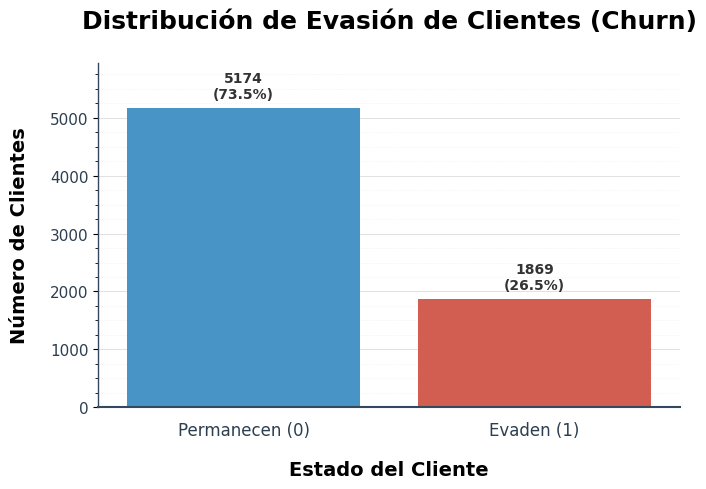

In [18]:
# VISUALIZACIÓN MEJORADA DE LA DISTRIBUCIÓN DE CHURN (CON GRID FINA)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker # Necesario para los locators

col_churn = 'churn' 

if not df.empty and col_churn in df.columns:
    plt.figure(figsize=(7, 5))
    
    churn_labels_for_plot = df[col_churn].map({0: 'Permanecen (0)', 1: 'Evaden (1)'})
    
    ax = sns.countplot(
        x=churn_labels_for_plot,
        hue=churn_labels_for_plot, 
        palette=['#3498db', '#e74c3c'],
        order=['Permanecen (0)', 'Evaden (1)'],
        legend=False
    )
    
    plt.title('Distribución de Evasión de Clientes (Churn)', 
              fontsize=18, fontweight='bold', pad=25) # Aumenté un poco el pad y fontsize
    plt.xlabel('Estado del Cliente', fontsize=14, fontweight='bold', labelpad=15) # labelpad para espacio
    plt.ylabel('Número de Clientes', fontsize=14, fontweight='bold', labelpad=15) # labelpad para espacio
    
    total = len(df[col_churn])
    max_height = 0 # Para calcular el límite superior del eje Y
    
    for p in ax.patches:
        count = int(p.get_height())
        if count > max_height: # Actualizar max_height
            max_height = count
        percentage = f'{100 * count / total:.1f}%'
        
        ax.annotate(f'{count}\n({percentage})', 
                    (p.get_x() + p.get_width() / 2., count), 
                    ha='center',
                    va='bottom', 
                    fontsize=10, # Ligeramente más pequeño para no saturar
                    fontweight='bold',
                    color='#333333', # Un gris oscuro para el texto
                    xytext=(0, 5),  # 5 puntos arriba de la barra
                    textcoords='offset points')
    
    ax.set_ylim(0, max_height * 1.15) # 15% más espacio arriba para el texto

    # --- ESTILO DE SPINES Y TICKS ---
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['left'].set_visible(False) # Considerar mantenerlo para referencia del eje Y si no poner grid fina
    
    ax.tick_params(axis='x', 
                   length=0, 
                   labelsize=12, # Ligeramente más grande
                   labelcolor='#2c3e50',
                   pad=10) 
    
    ax.tick_params(axis='y', 
                   labelsize=11, # Ligeramente más grande
                   labelcolor='#2c3e50',
                   left=True) # Mantener los ticks si se quiere grid fina

    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['bottom'].set_color('#34495e')
    ax.spines['left'].set_linewidth(1.0) # Si decido mantenerlo
    ax.spines['left'].set_color('#34495e') # Si decido mantenerlo

    # --- CONFIGURACIÓN DE LA GRID FINA ---
    # Grid principal (líneas más gruesas o visibles)
    ax.yaxis.grid(True, linestyle='-', linewidth=0.7, alpha=0.6, color='#cccccc') # Grid principal más visible
    
    # Grid secundaria/fina (líneas más sutiles entre las principales)
    # Para esto, a menudo necesito definir los locators.
    # Por ejemplo, si quiero una línea cada 500 clientes y una más fina cada 100:
    ax.yaxis.set_major_locator(ticker.MultipleLocator(base=1000)) # Línea principal cada 1000
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=250))  # Línea fina cada 250

    # Mostrar la grid menor (fina)
    ax.grid(which='minor', axis='y', linestyle=':', linewidth=0.5, alpha=0.5, color='#dddddd')
    
    # Asegurame que la grid esté detrás de las barras
    ax.set_axisbelow(True)
    
    # Quitar la línea duplicada de plt.grid(True) que tenía al final
    # La configuración de ax.yaxis.grid() y ax.grid(which='minor'...) es más específica.
    
    plt.tight_layout() # Ajustar para que todo quepa bien
    plt.show()
    
else:
    print("DataFrame vacío o la columna 'churn' no existe.")

---
#### 3.2.2. Distribución de Evasión (Churn) por Variables Categóricas

##### A. Conteos Absolutos de Churn por Categoría
Exploramos cómo se distribuye la evasión (churn) según diferentes características categóricas de los clientes.

--- ANÁLISIS DE EVASIÓN POR VARIABLES CATEGÓRICAS (CONTEOS) ---


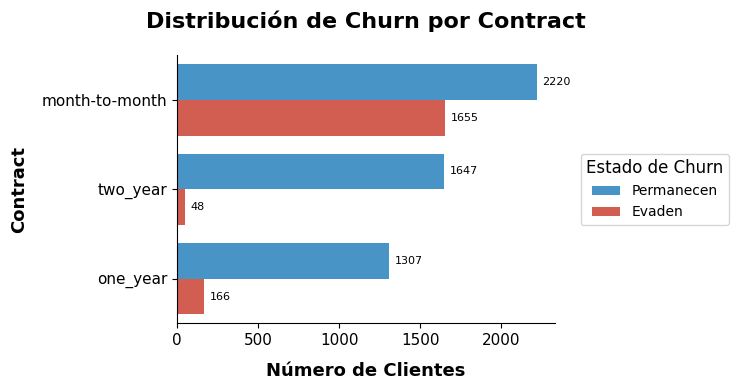

----------------------------------------------------------------------


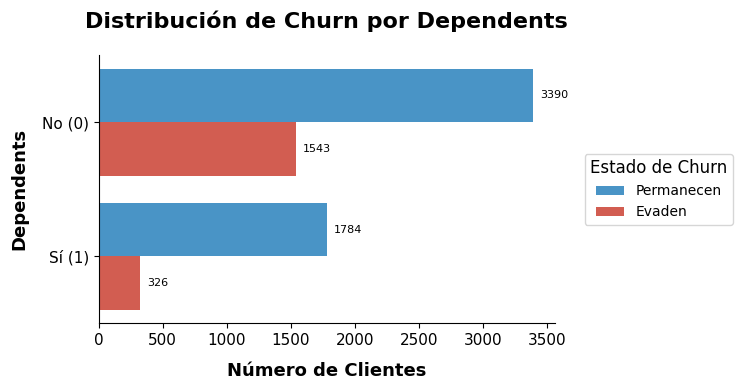

----------------------------------------------------------------------


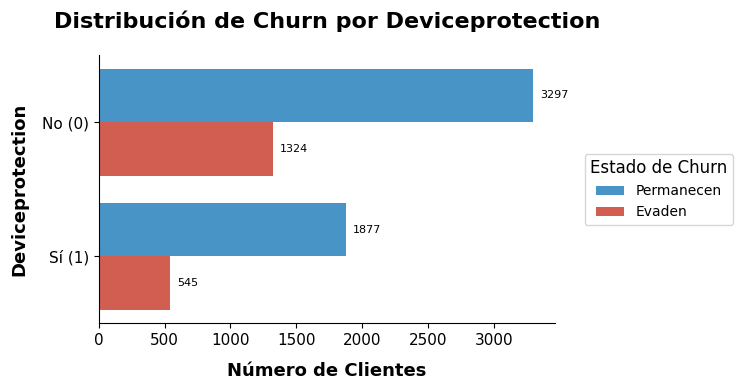

----------------------------------------------------------------------


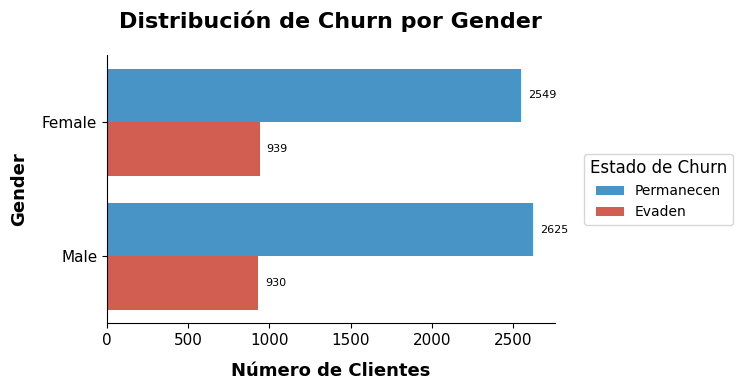

----------------------------------------------------------------------


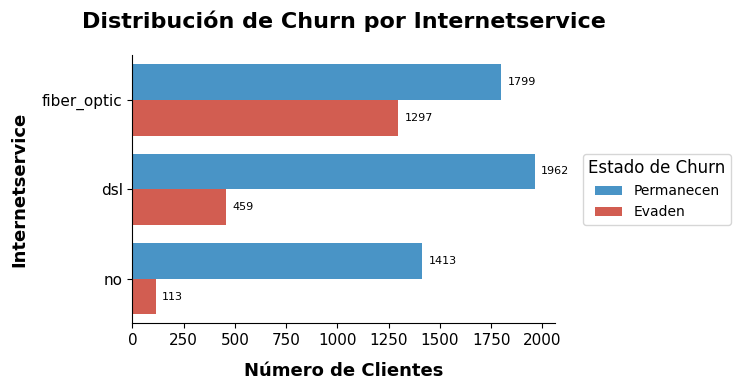

----------------------------------------------------------------------


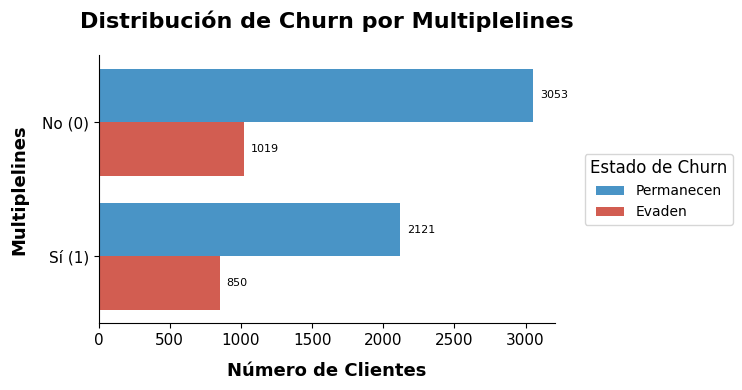

----------------------------------------------------------------------


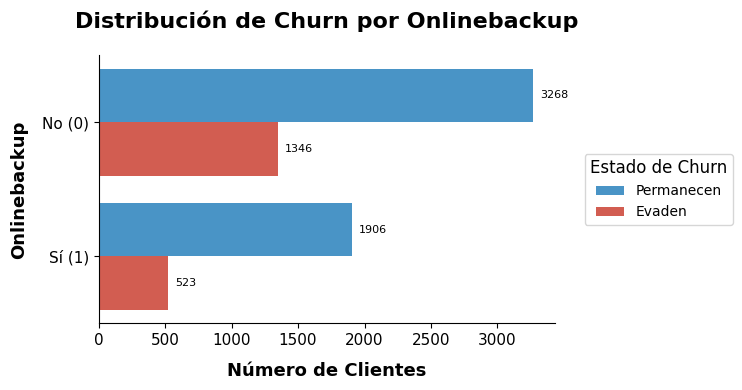

----------------------------------------------------------------------


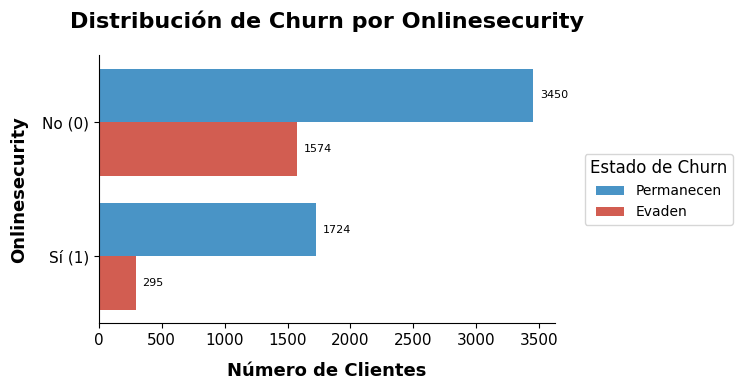

----------------------------------------------------------------------


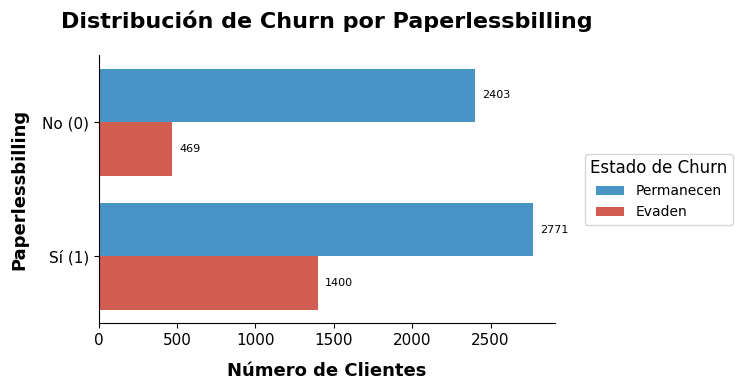

----------------------------------------------------------------------


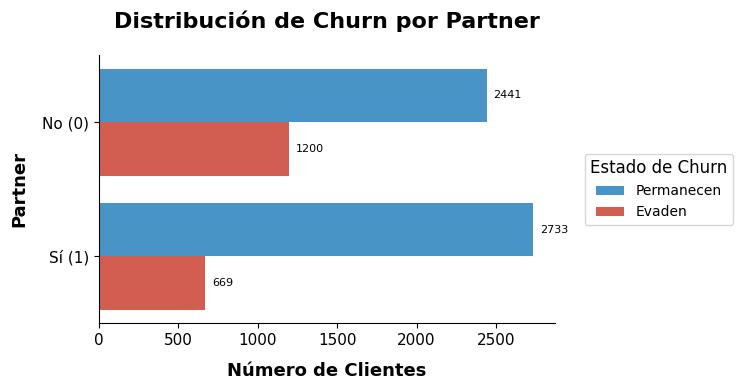

----------------------------------------------------------------------


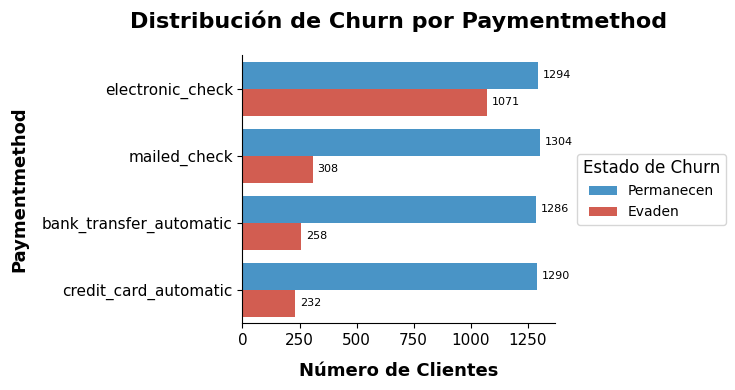

----------------------------------------------------------------------


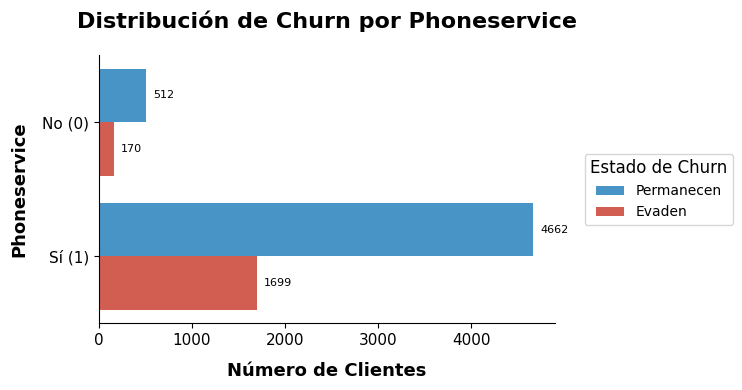

----------------------------------------------------------------------


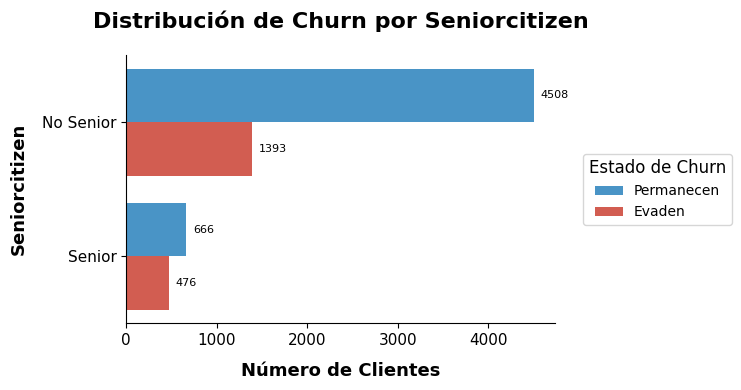

----------------------------------------------------------------------


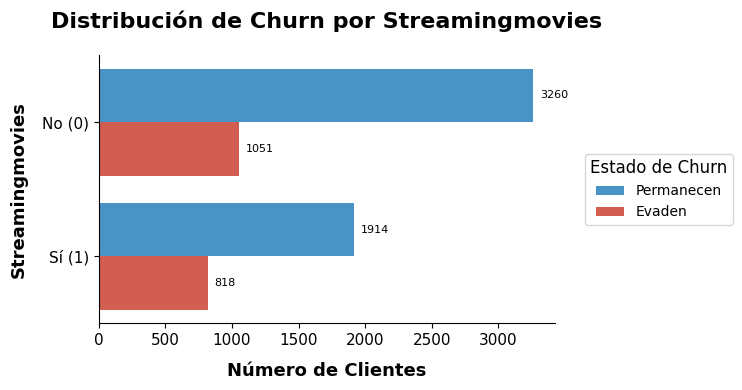

----------------------------------------------------------------------


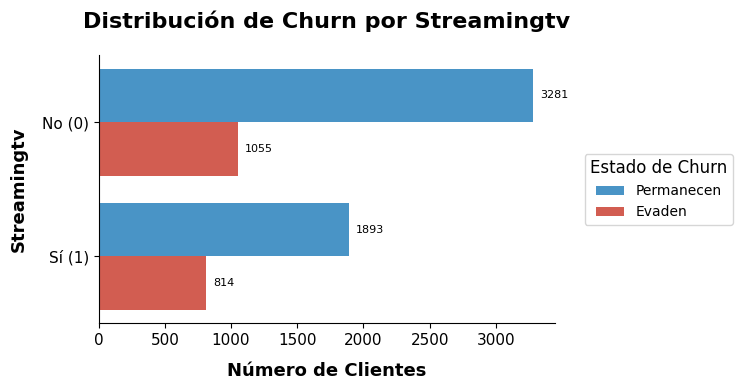

----------------------------------------------------------------------


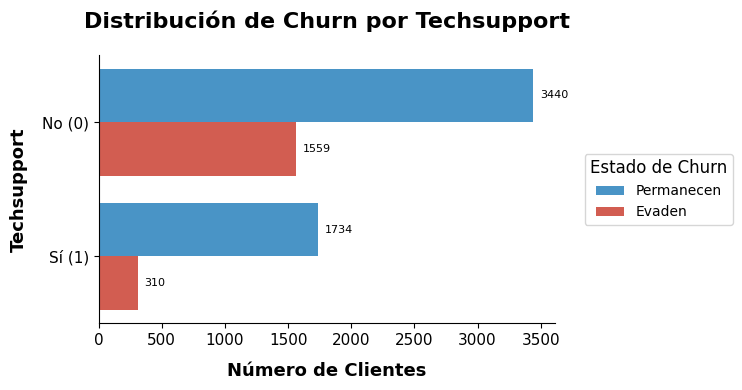

----------------------------------------------------------------------


In [19]:
# VISUALIZACIÓN DE CHURN POR VARIABLES CATEGÓRICAS (COUNTPLOTS MEJORADOS) CON ANOTACIONES

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display

col_churn = 'churn'

if not df.empty and col_churn in df.columns:
    print("--- ANÁLISIS DE EVASIÓN POR VARIABLES CATEGÓRICAS (CONTEOS) ---")
    
    categorical_multivalue_cols = df.select_dtypes(include=['object', 'category', 'string']).columns.tolist()
    if 'customerid' in categorical_multivalue_cols:
        categorical_multivalue_cols.remove('customerid')

    binary_cols_as_cat_for_plot = [
        'gender', 'seniorcitizen', 'partner', 'dependents', 
        'phoneservice', 'multiplelines', 'onlinesecurity', 
        'onlinebackup', 'deviceprotection', 'techsupport', 
        'streamingtv', 'streamingmovies', 'paperlessbilling'
    ]
    binary_cols_as_cat_for_plot = [col for col in binary_cols_as_cat_for_plot if col in df.columns]
    
    features_to_analyze = sorted(list(set(categorical_multivalue_cols + binary_cols_as_cat_for_plot)))

    churn_legend_map = {0: 'Permanecen', 1: 'Evaden'}

    for feature in features_to_analyze:
        if feature in df.columns and feature != col_churn:
            
            data_plot_cat = df.copy()
            order_for_plot = None
            feature_label = feature.capitalize().replace("_", " ")

            if data_plot_cat[feature].dtype in ['int64', 'Int64'] and df[feature].nunique() == 2:
                unique_vals_feat = sorted(df[feature].dropna().unique().tolist())
                if len(unique_vals_feat) == 2 and all(isinstance(x, (int, np.integer)) for x in unique_vals_feat):
                    map_dict_feat = {unique_vals_feat[0]: f'No ({unique_vals_feat[0]})', 
                                     unique_vals_feat[1]: f'Sí ({unique_vals_feat[1]})'}
                    if feature == 'gender': map_dict_feat = {0: 'Female', 1: 'Male'}
                    elif feature == 'seniorcitizen': map_dict_feat = {0: 'No Senior', 1: 'Senior'}
                    
                    data_plot_cat[feature] = data_plot_cat[feature].map(map_dict_feat)
                    # Asegurarme de que el orden solo incluya valores presentes después del mapeo
                    order_for_plot = [val for val in [map_dict_feat.get(uv) for uv in unique_vals_feat] if val is not None]

            if order_for_plot is None or not order_for_plot: # Si el orden no se pudo determinar o está vacío
                order_for_plot = data_plot_cat[feature].value_counts().index.tolist()


            plt.figure(figsize=(9, max(4, len(order_for_plot) * 0.6) ))
            
            ax = sns.countplot(
                data=data_plot_cat, 
                y=feature, # Barras horizontales
                hue=df[col_churn].map(churn_legend_map),
                palette={'Permanecen': '#3498db', 'Evaden': '#e74c3c'},
                order=order_for_plot
            )
            
            plt.title(f'Distribución de Churn por {feature_label}', fontsize=16, fontweight='bold', pad=20)
            plt.xlabel('Número de Clientes', fontsize=13, fontweight='bold', labelpad=10)
            plt.ylabel(feature_label, fontsize=13, fontweight='bold', labelpad=10)
            
            ax.tick_params(axis='both', labelsize=11)
            sns.despine()

            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, labels, title='Estado de Churn', title_fontsize='12', 
                      loc='center left', bbox_to_anchor=(1.05, 0.5))

            # --- Bloque de Anotaciones DESCOMENTADO y AJUSTADO para barras horizontales ---
            for p in ax.patches: # ax.patches son las barras individuales
                width = p.get_width() # Para barras horizontales, la longitud es el ancho
                if width > 0: # Solo anotar si la barra tiene un ancho visible
                    # Posición x: un poco a la derecha del final de la barra
                    # Posición y: en el centro vertical de la barra
                    ax.text(width + (ax.get_xlim()[1] * 0.015), # Pequeño offset desde el final de la barra
                            p.get_y() + p.get_height() / 2.,   # Centro vertical de la barra
                            f'{int(width)}',                   # El texto a mostrar (el conteo)
                            ha='left',                         # Alineación horizontal
                            va='center',                       # Alineación vertical
                            fontsize=8,                        # Tamaño de fuente para las anotaciones
                            color='black')                     # Color del texto
            # ----------------------------------------------------------------------------
            
            plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajustar para que quepa la leyenda
            plt.show()
            print("-" * 70)
else:
    print(f"DataFrame vacío o la columna '{col_churn}' no disponible.")

---
##### B. Tasas de Evasión por Categoría
Para profundizar, calculamos y visualizamos la tasa de evasión específica para cada categoría de las variables.



--- ANÁLISIS DE TASA DE EVASIÓN Y PROPORCIONES POR VARIABLES CATEGÓRICAS ---


--- Análisis Comparativo para: Contract ---


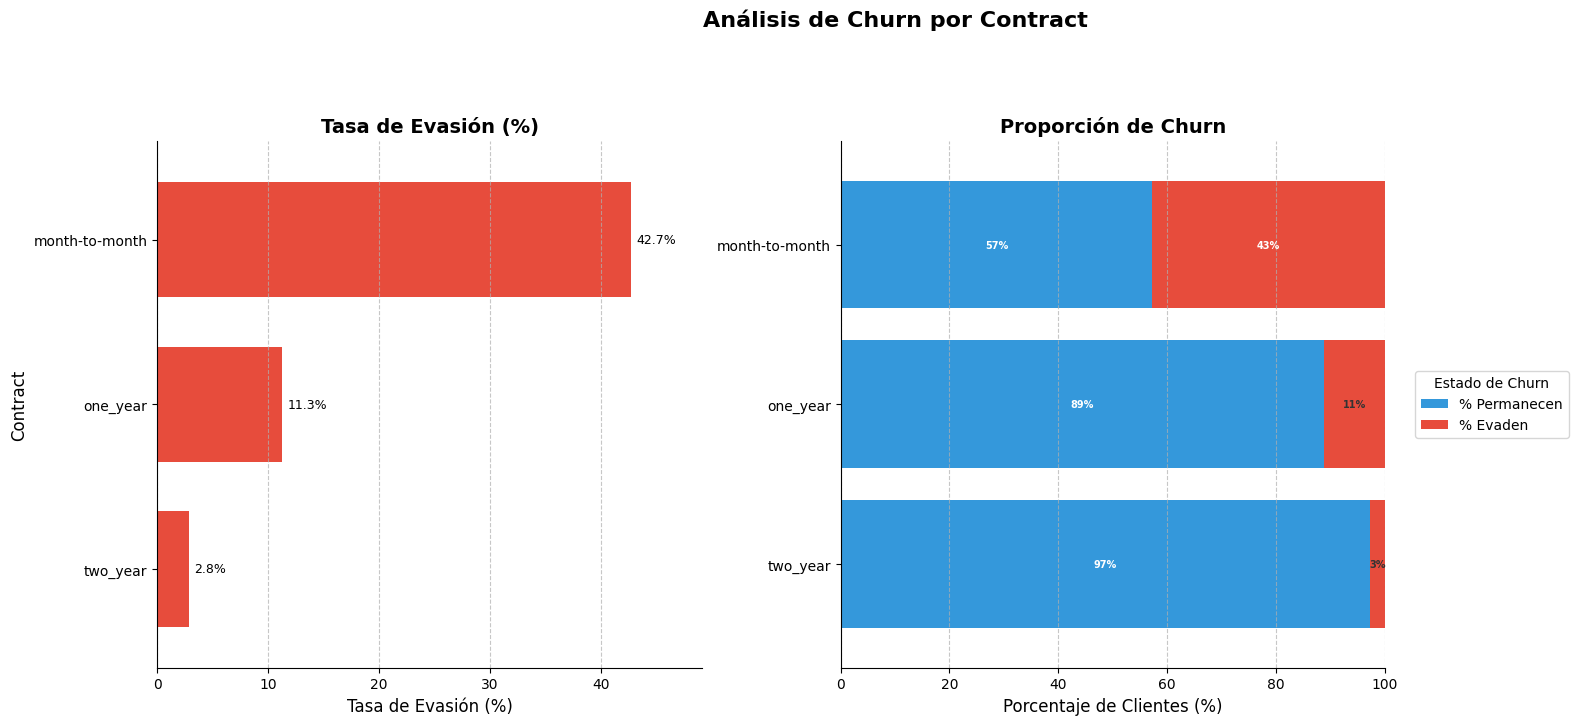


Porcentaje de Evasión/Permanencia por categoría (ordenado por % Evaden):


churn,% Permanecen,% Evaden
contract,,
two_year,97.168142,2.831858
one_year,88.730482,11.269518
month-to-month,57.290323,42.709677


----------------------------------------------------------------------


--- Análisis Comparativo para: Dependents ---


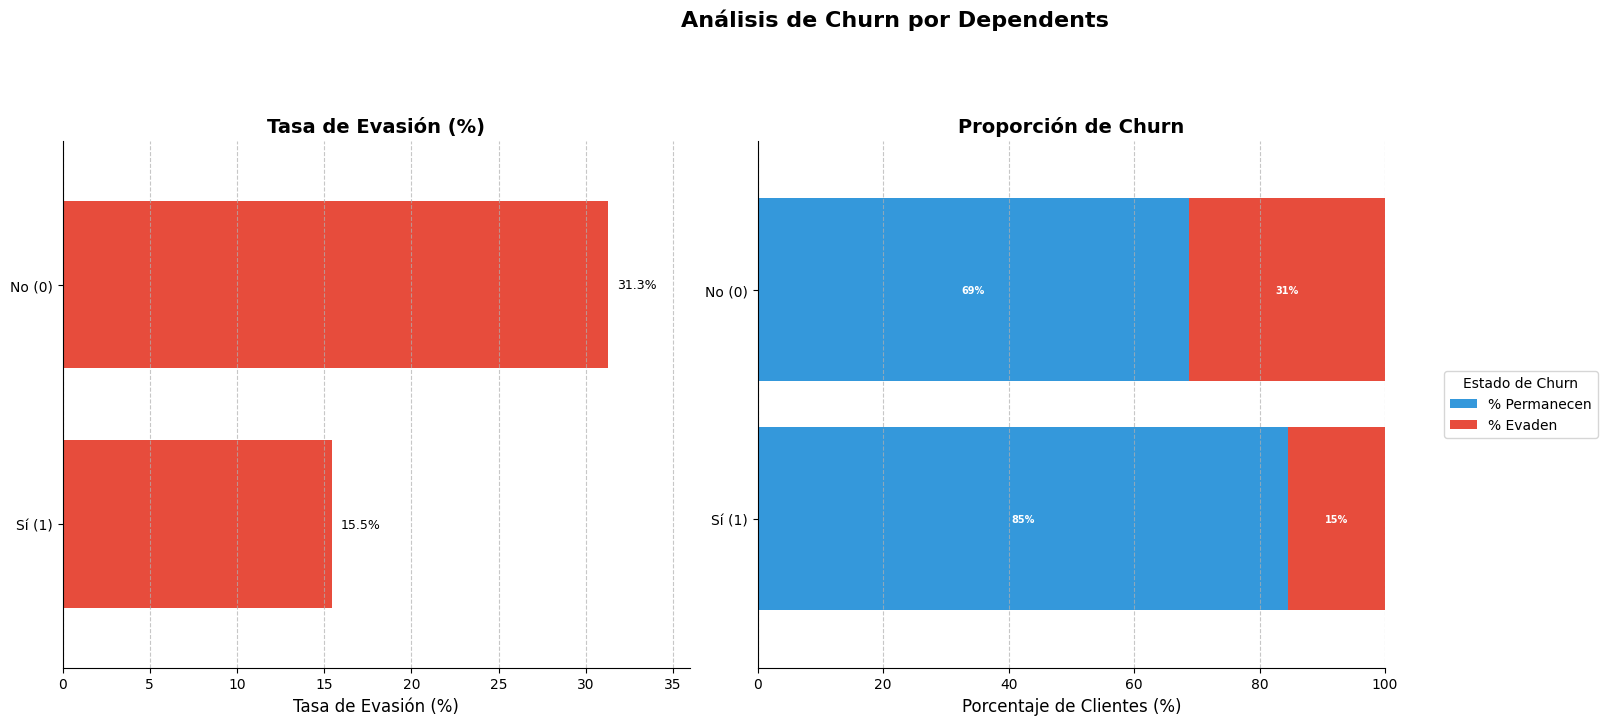


Porcentaje de Evasión/Permanencia por categoría (ordenado por % Evaden):


churn,% Permanecen,% Evaden
dependents,,
1,84.549763,15.450237
0,68.720860,31.279140


----------------------------------------------------------------------


--- Análisis Comparativo para: Deviceprotection ---


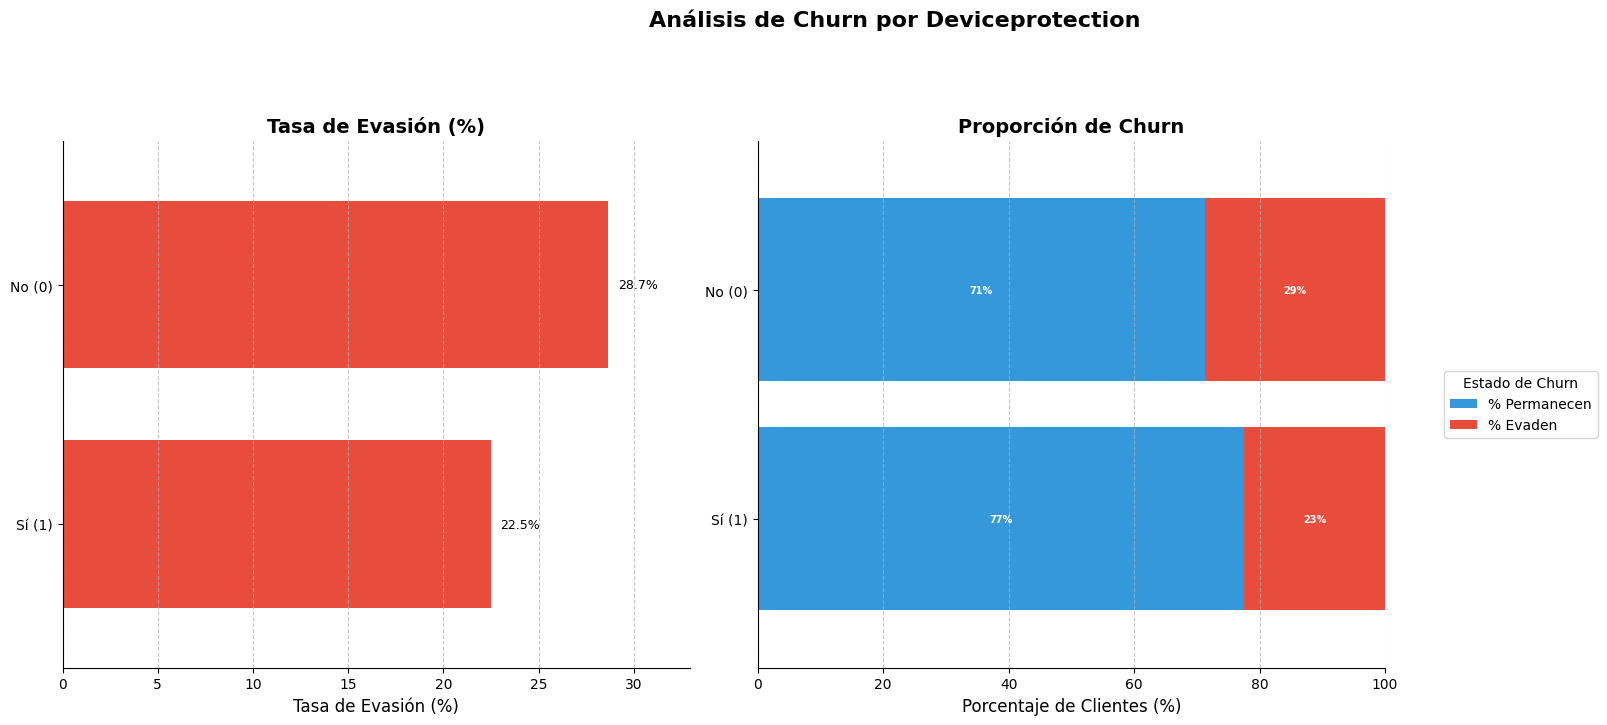


Porcentaje de Evasión/Permanencia por categoría (ordenado por % Evaden):


churn,% Permanecen,% Evaden
deviceprotection,,
1,77.497936,22.502064
0,71.348193,28.651807


----------------------------------------------------------------------


--- Análisis Comparativo para: Gender ---


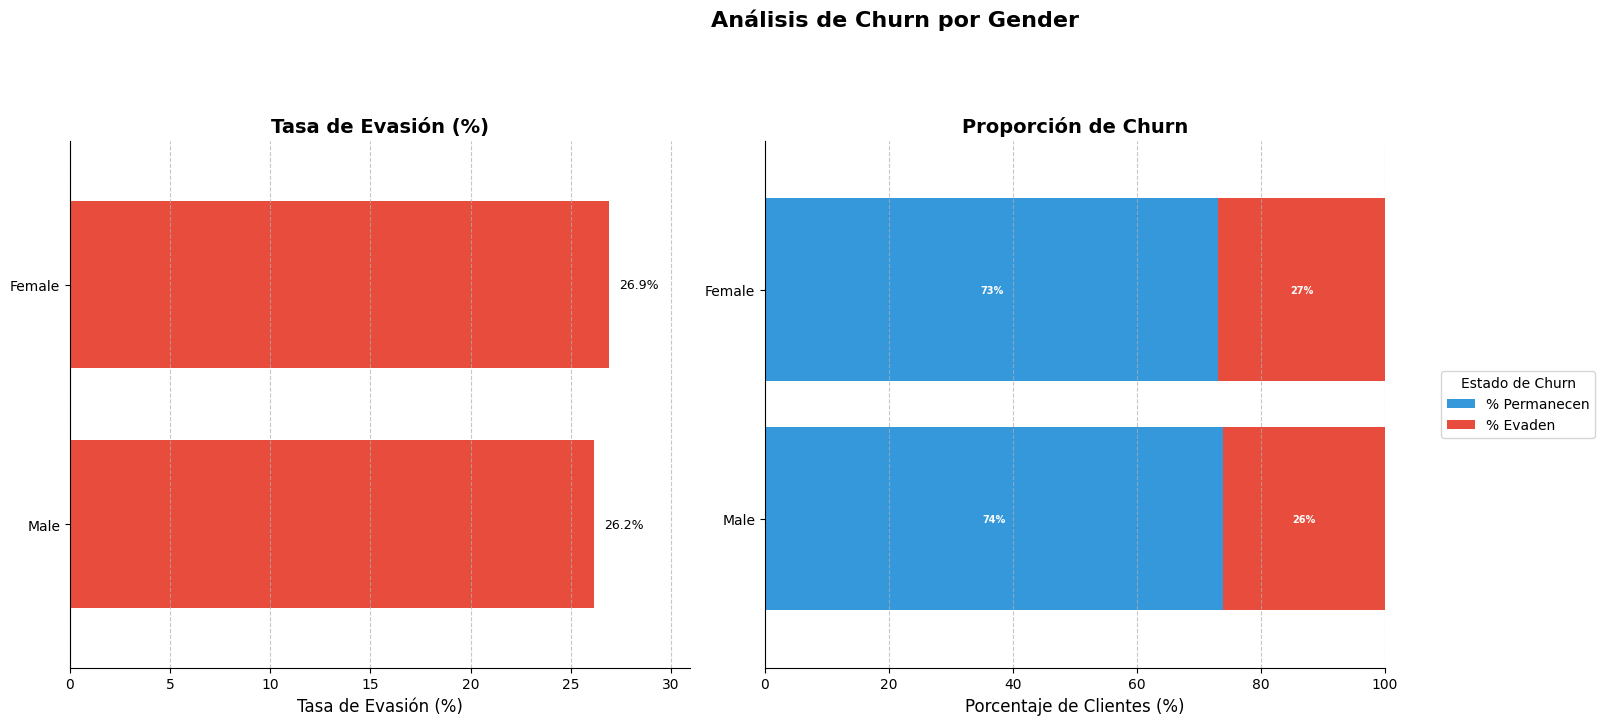


Porcentaje de Evasión/Permanencia por categoría (ordenado por % Evaden):


churn,% Permanecen,% Evaden
gender,,
1,73.839662,26.160338
0,73.079128,26.920872


----------------------------------------------------------------------


--- Análisis Comparativo para: Internetservice ---


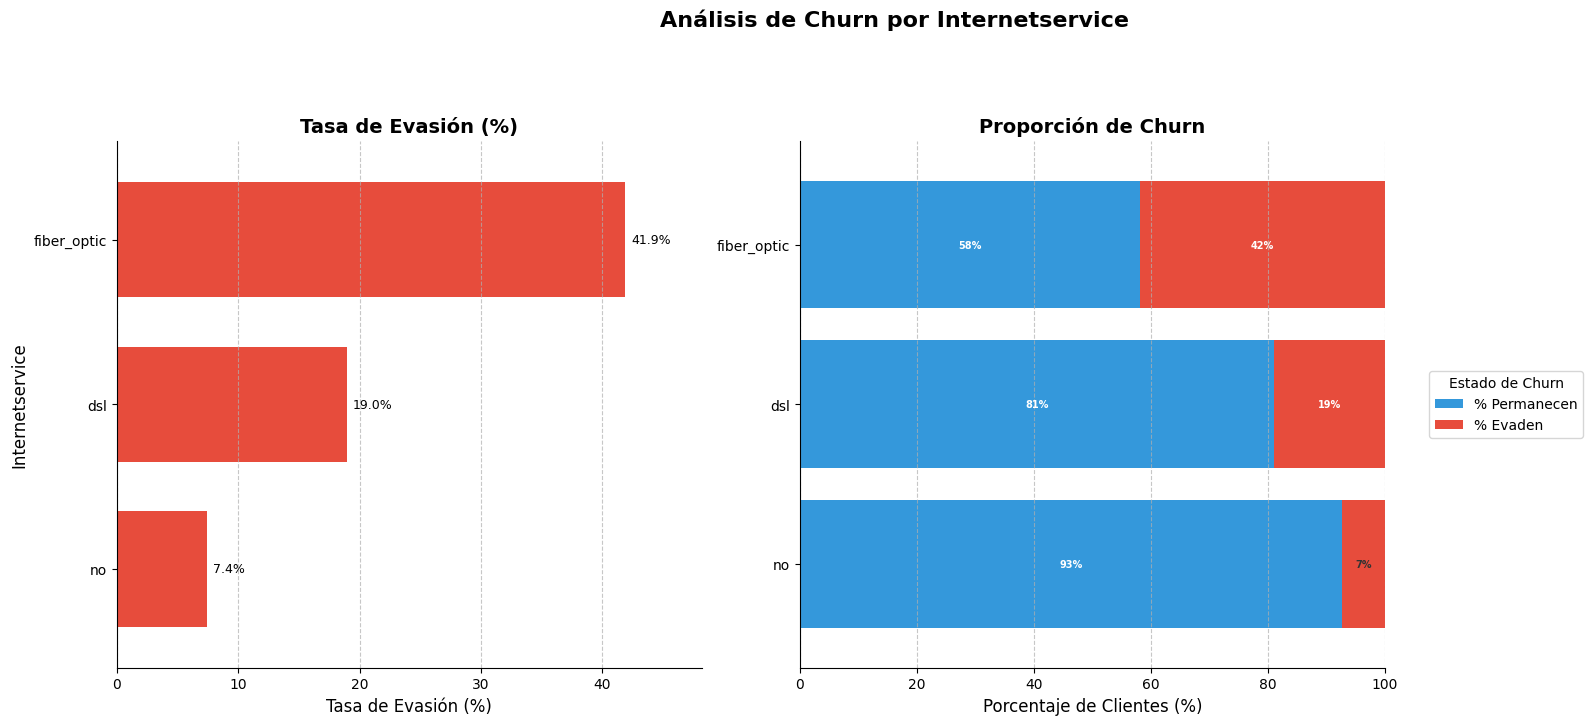


Porcentaje de Evasión/Permanencia por categoría (ordenado por % Evaden):


churn,% Permanecen,% Evaden
internetservice,,
no,92.595020,7.404980
dsl,81.040892,18.959108
fiber_optic,58.107235,41.892765


----------------------------------------------------------------------


--- Análisis Comparativo para: Multiplelines ---


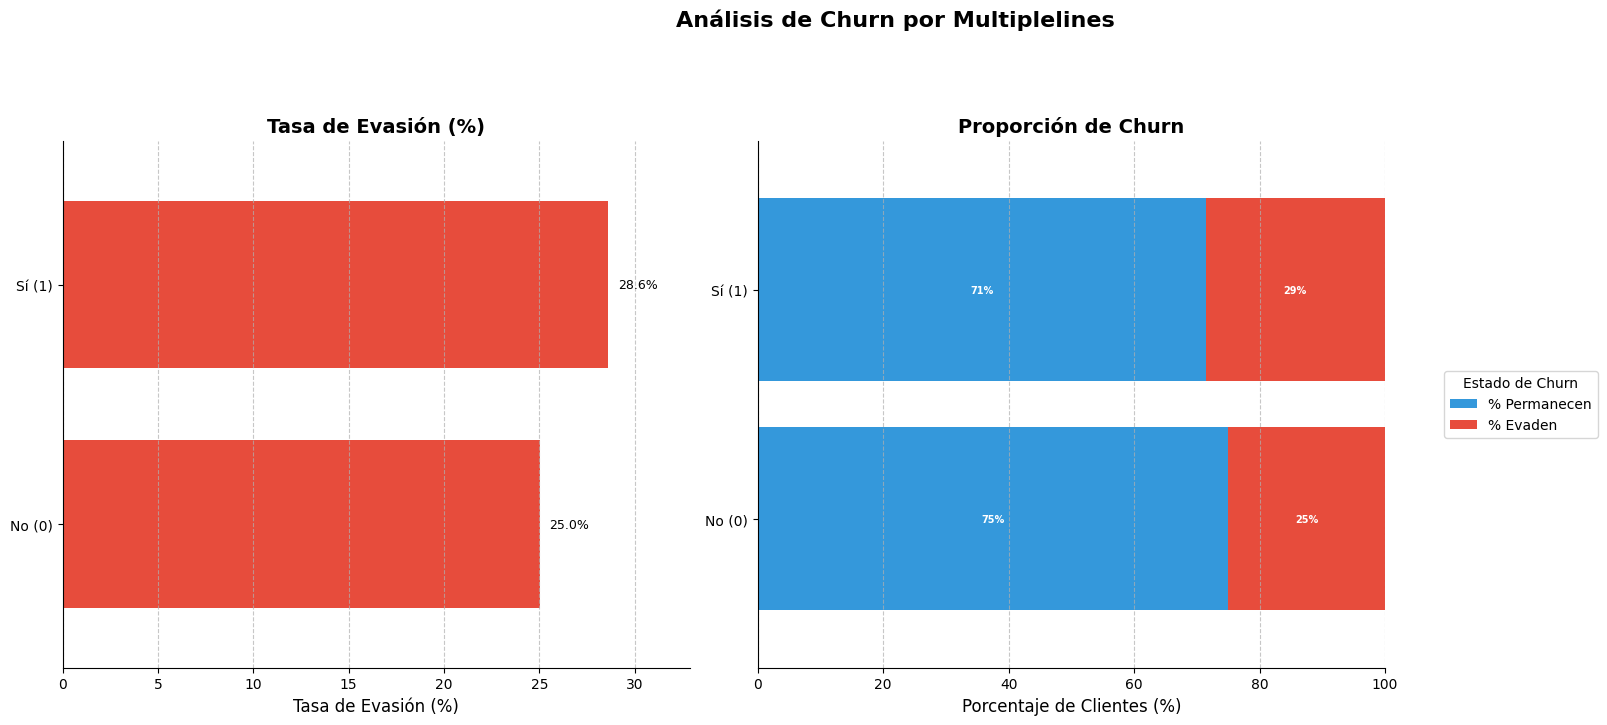


Porcentaje de Evasión/Permanencia por categoría (ordenado por % Evaden):


churn,% Permanecen,% Evaden
multiplelines,,
0,74.975442,25.024558
1,71.390104,28.609896


----------------------------------------------------------------------


--- Análisis Comparativo para: Onlinebackup ---


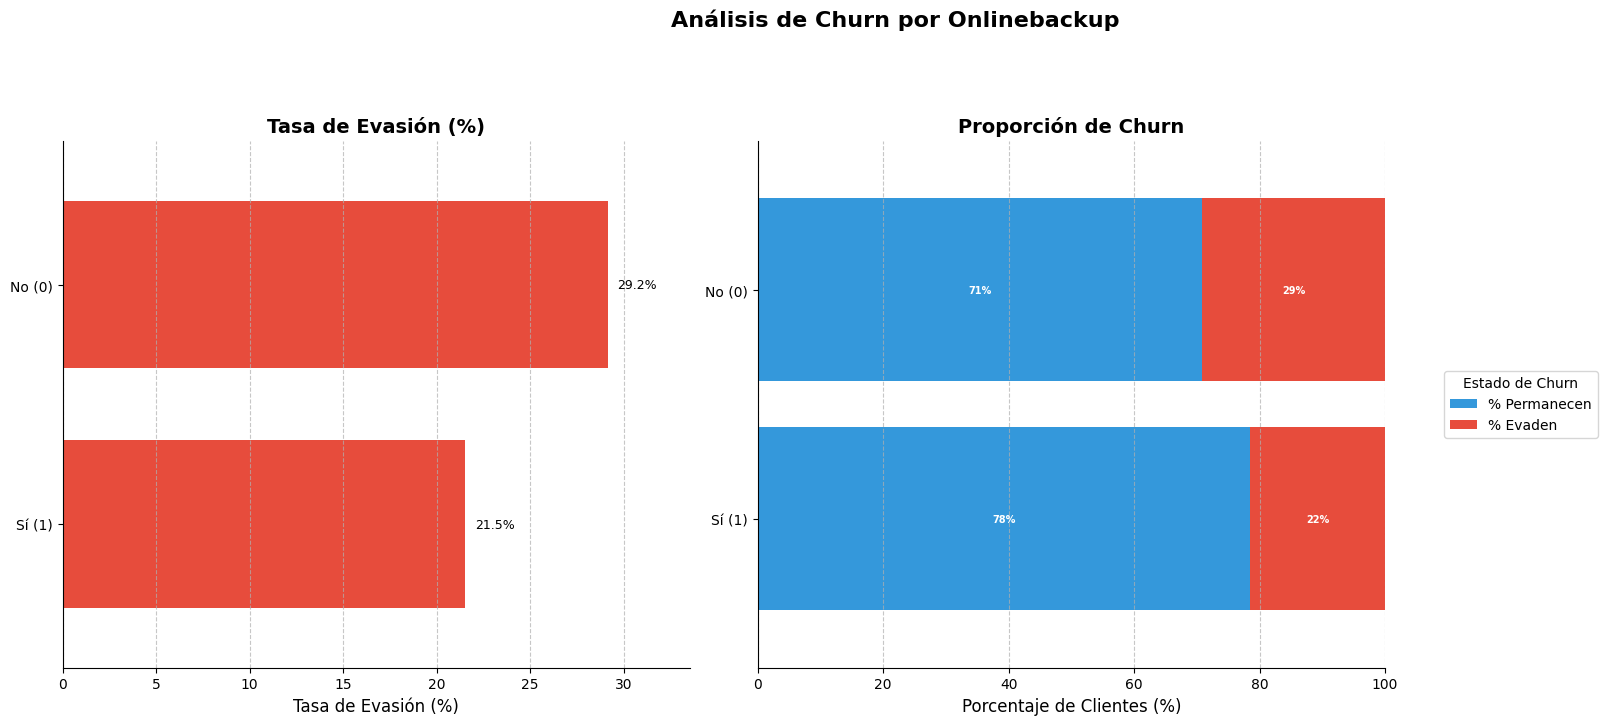


Porcentaje de Evasión/Permanencia por categoría (ordenado por % Evaden):


churn,% Permanecen,% Evaden
onlinebackup,,
1,78.468506,21.531494
0,70.827915,29.172085


----------------------------------------------------------------------


--- Análisis Comparativo para: Onlinesecurity ---


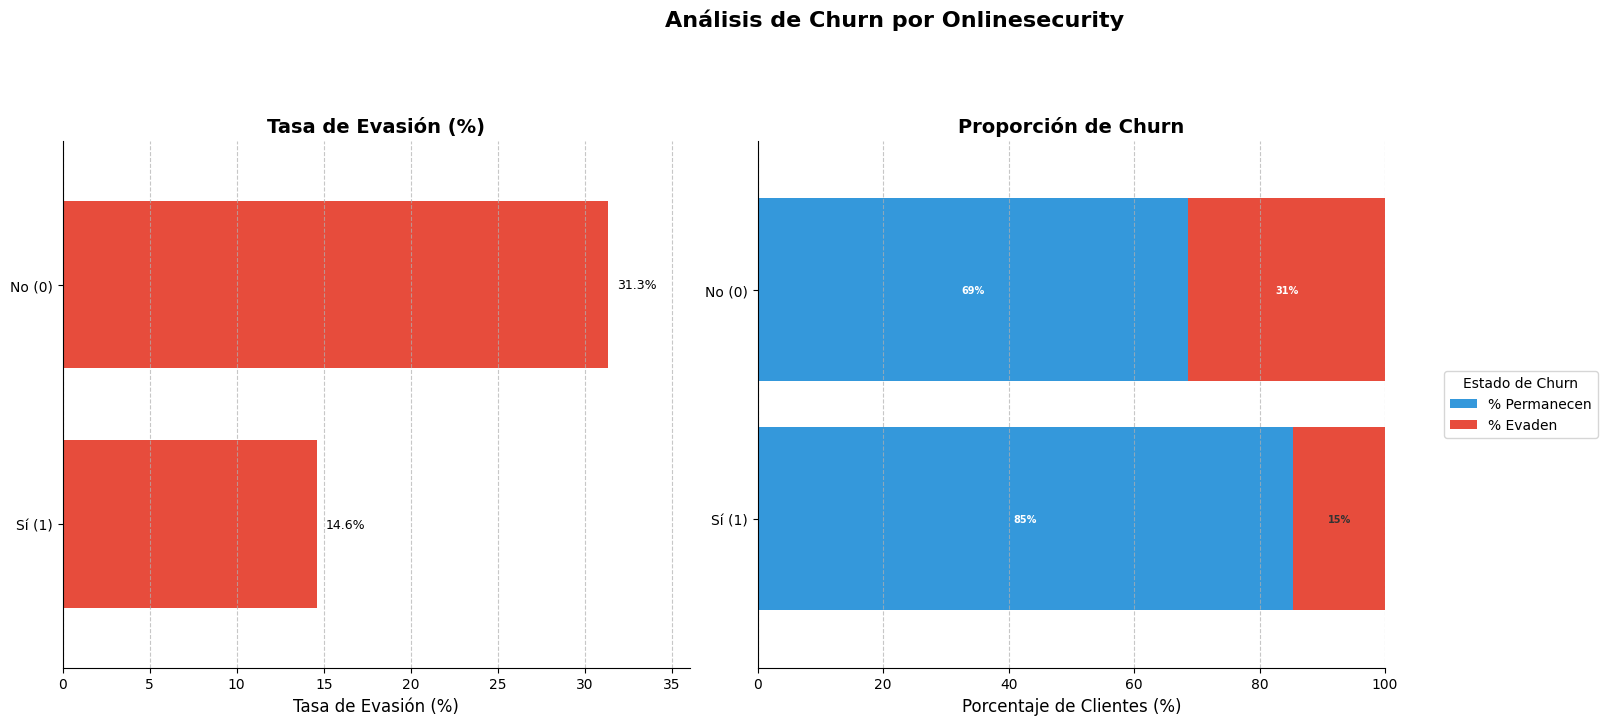


Porcentaje de Evasión/Permanencia por categoría (ordenado por % Evaden):


churn,% Permanecen,% Evaden
onlinesecurity,,
1,85.388806,14.611194
0,68.670382,31.329618


----------------------------------------------------------------------


--- Análisis Comparativo para: Paperlessbilling ---


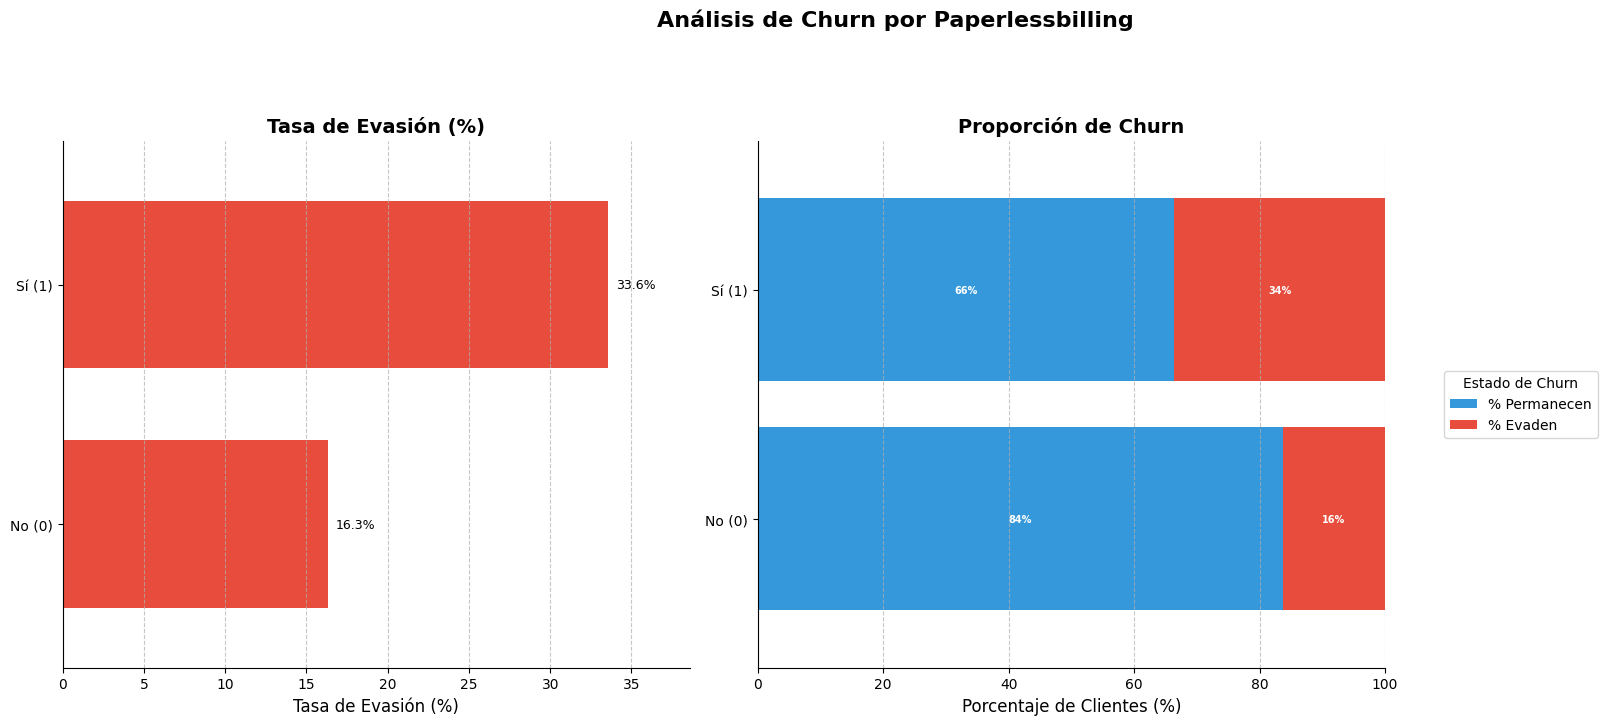


Porcentaje de Evasión/Permanencia por categoría (ordenado por % Evaden):


churn,% Permanecen,% Evaden
paperlessbilling,,
0,83.669916,16.330084
1,66.434908,33.565092


----------------------------------------------------------------------


--- Análisis Comparativo para: Partner ---


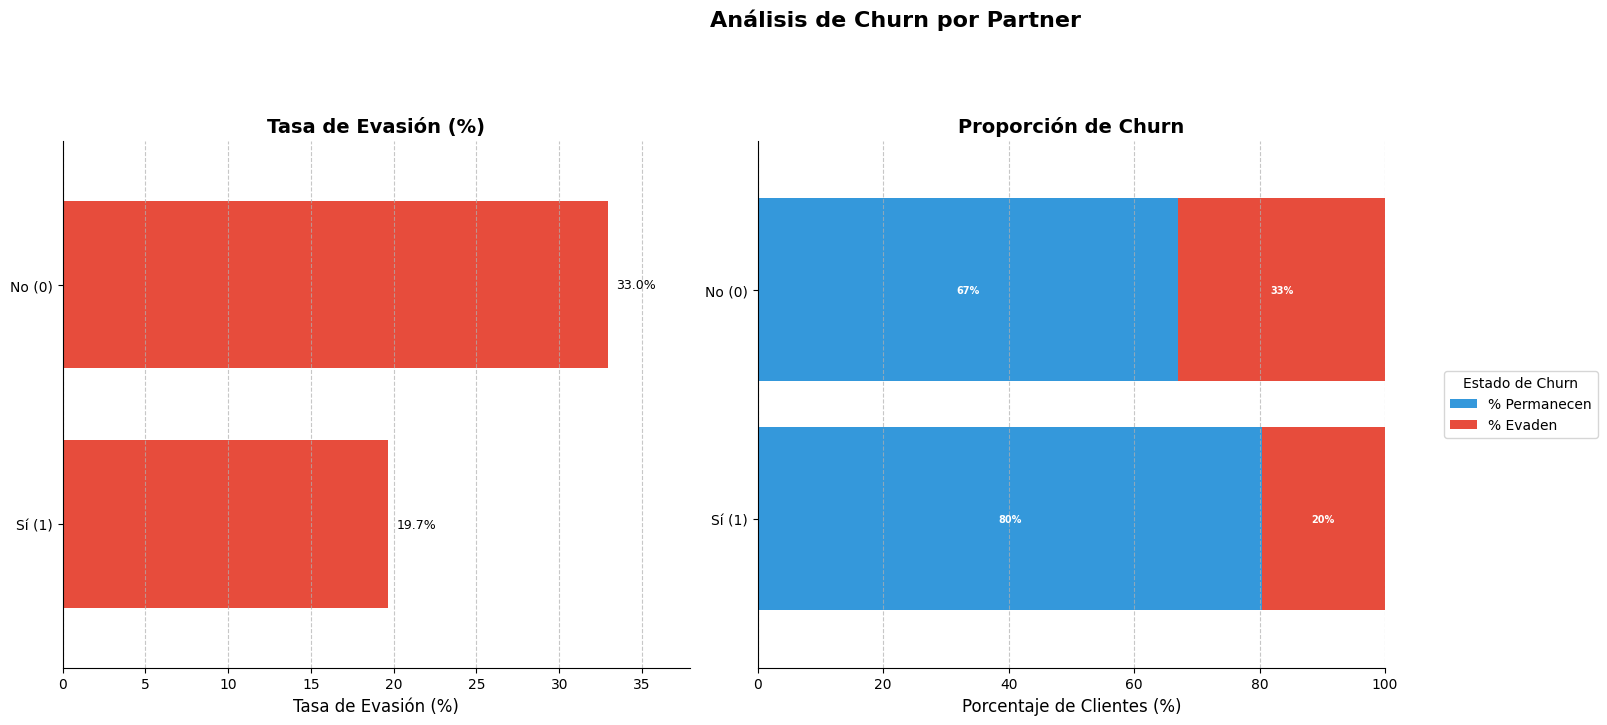


Porcentaje de Evasión/Permanencia por categoría (ordenado por % Evaden):


churn,% Permanecen,% Evaden
partner,,
1,80.335097,19.664903
0,67.042021,32.957979


----------------------------------------------------------------------


--- Análisis Comparativo para: Paymentmethod ---


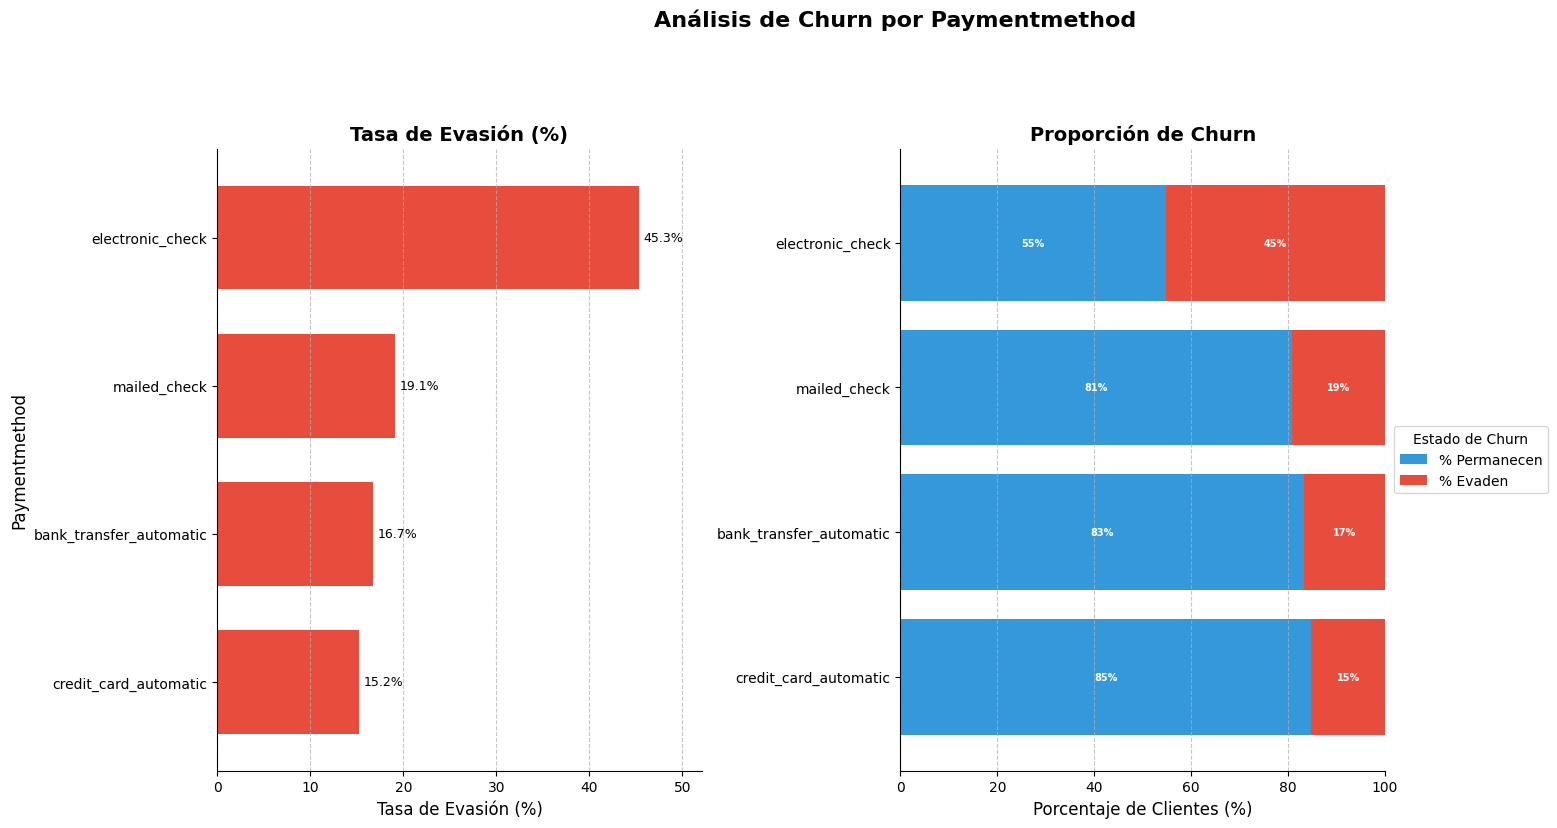


Porcentaje de Evasión/Permanencia por categoría (ordenado por % Evaden):


churn,% Permanecen,% Evaden
paymentmethod,,
credit_card_automatic,84.756899,15.243101
bank_transfer_automatic,83.290155,16.709845
mailed_check,80.893300,19.106700
electronic_check,54.714588,45.285412


----------------------------------------------------------------------


--- Análisis Comparativo para: Phoneservice ---


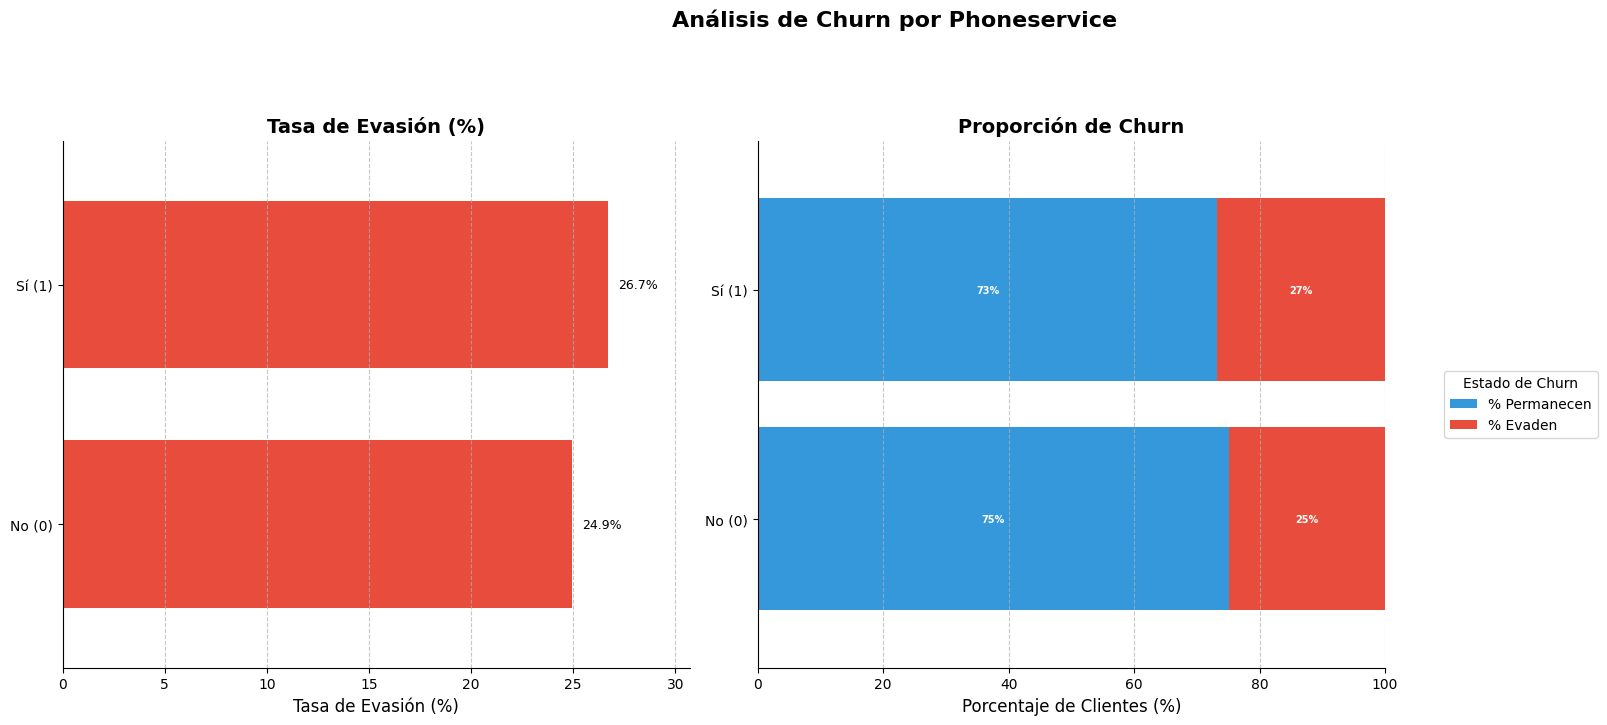


Porcentaje de Evasión/Permanencia por categoría (ordenado por % Evaden):


churn,% Permanecen,% Evaden
phoneservice,,
0,75.073314,24.926686
1,73.290363,26.709637


----------------------------------------------------------------------


--- Análisis Comparativo para: Seniorcitizen ---


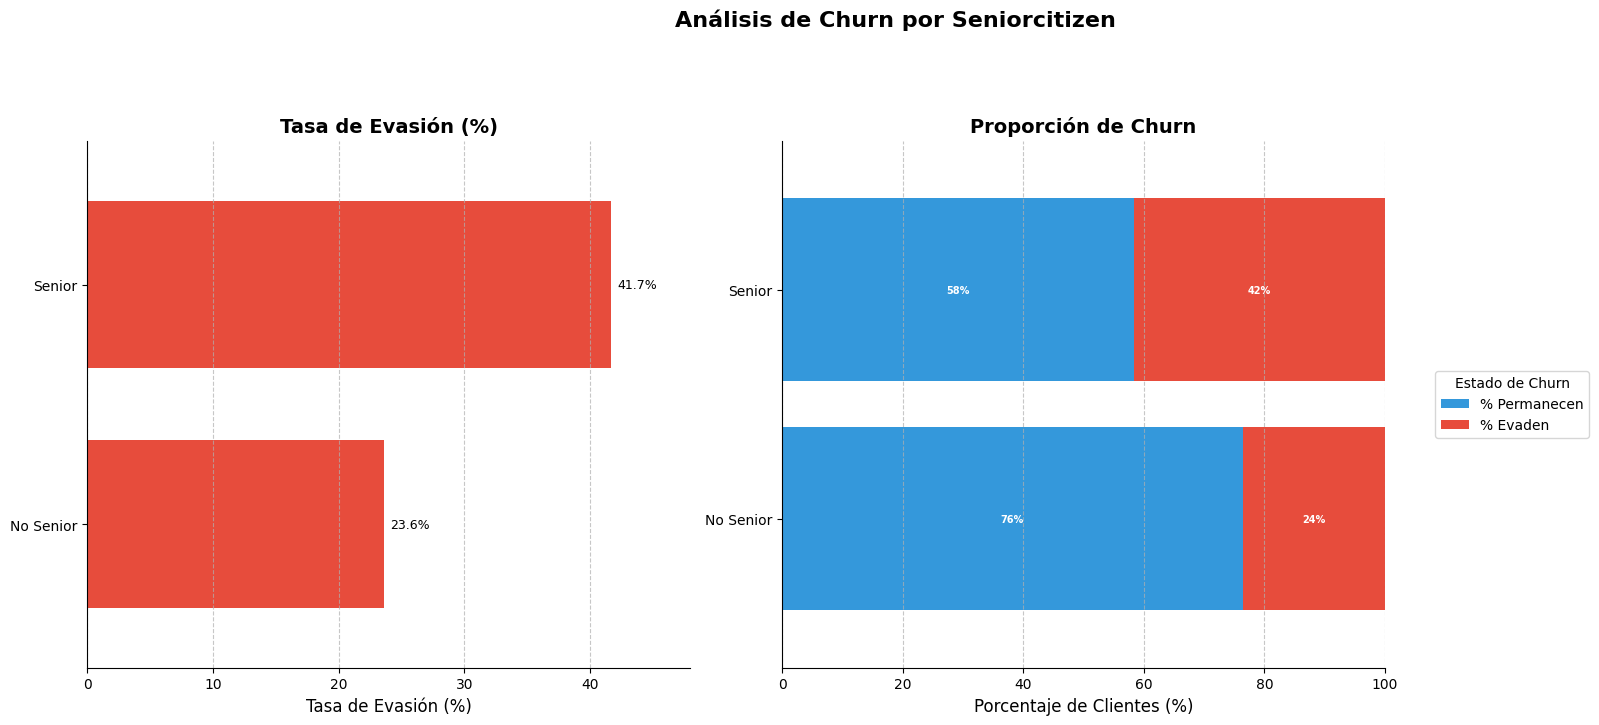


Porcentaje de Evasión/Permanencia por categoría (ordenado por % Evaden):


churn,% Permanecen,% Evaden
seniorcitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


----------------------------------------------------------------------


--- Análisis Comparativo para: Streamingmovies ---


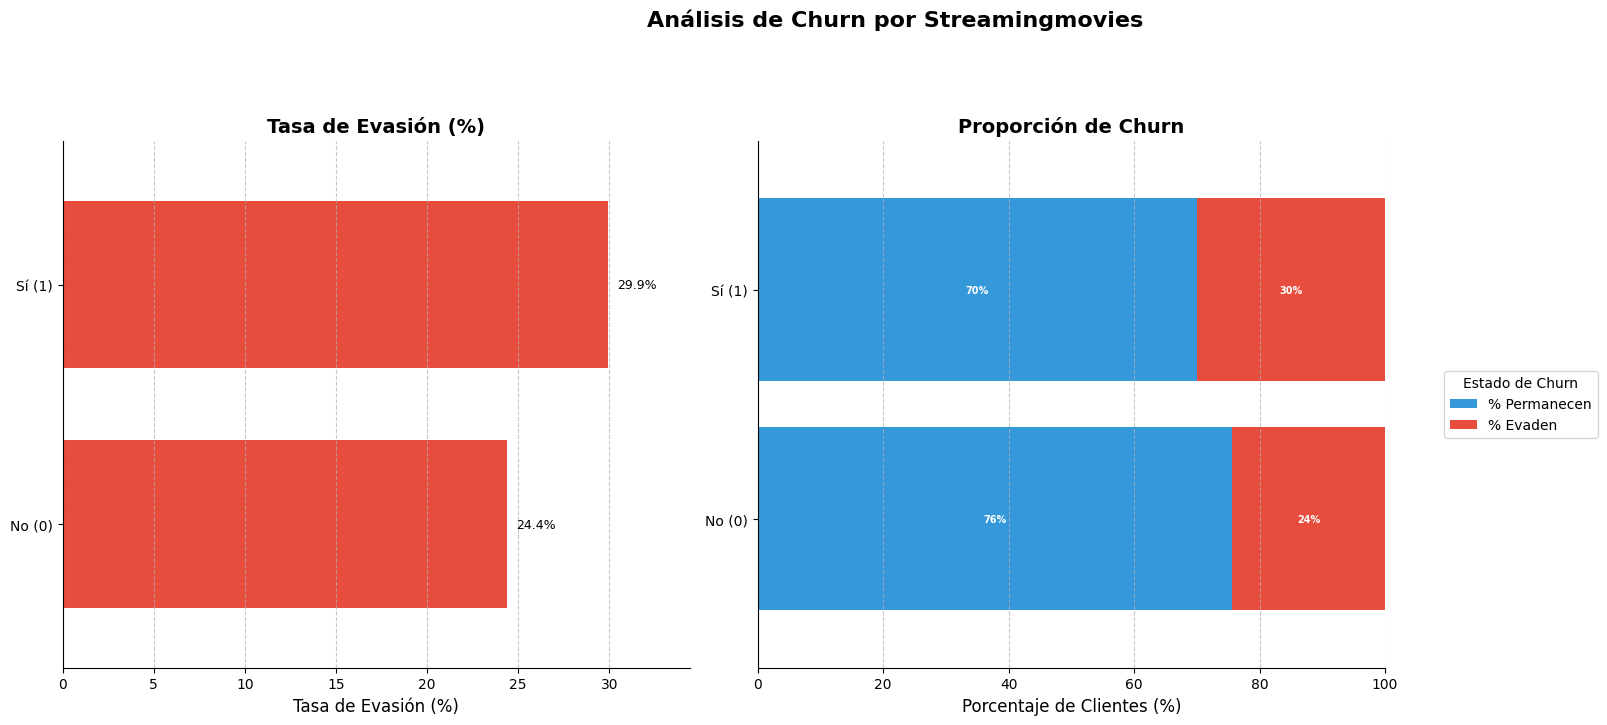


Porcentaje de Evasión/Permanencia por categoría (ordenado por % Evaden):


churn,% Permanecen,% Evaden
streamingmovies,,
0,75.620506,24.379494
1,70.058565,29.941435


----------------------------------------------------------------------


--- Análisis Comparativo para: Streamingtv ---


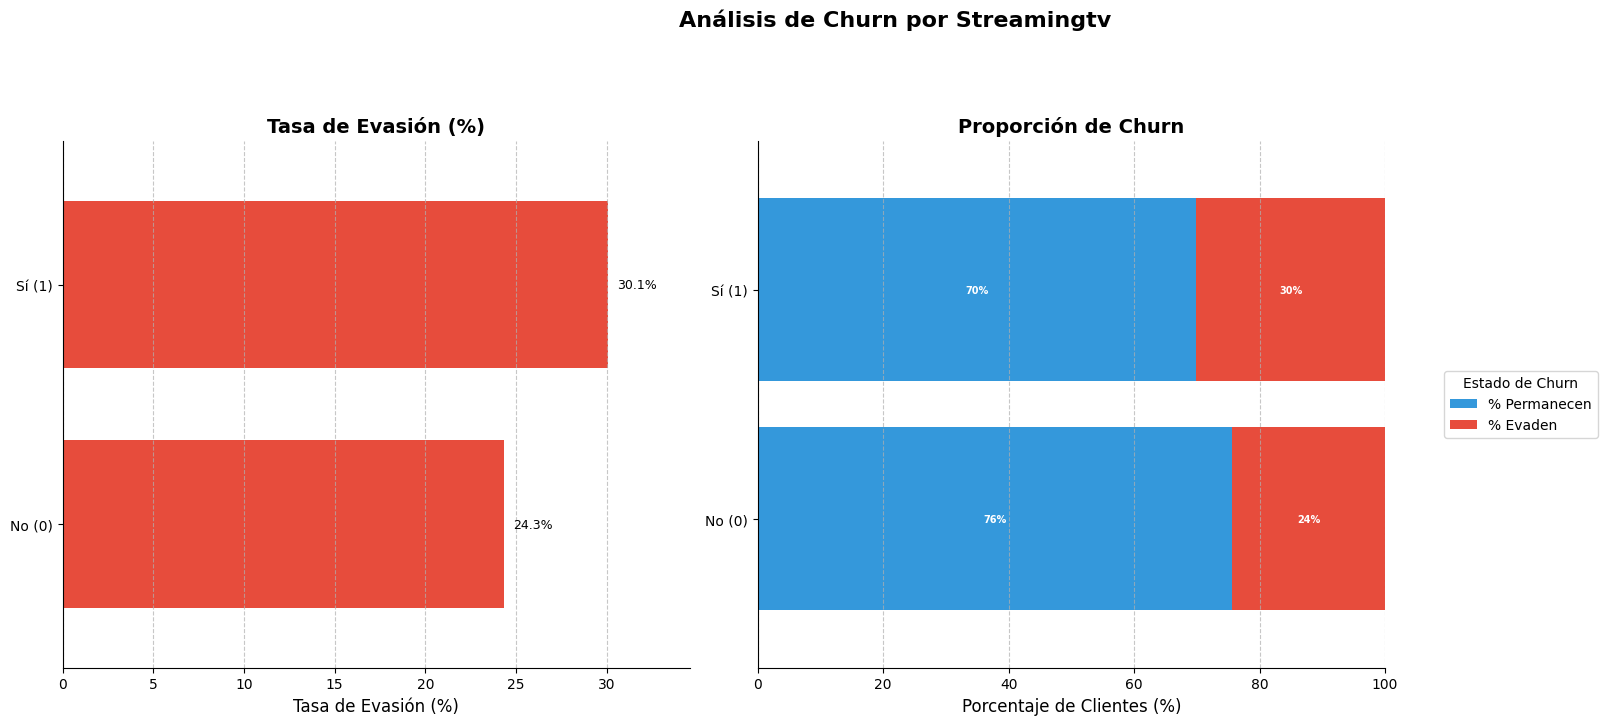


Porcentaje de Evasión/Permanencia por categoría (ordenado por % Evaden):


churn,% Permanecen,% Evaden
streamingtv,,
0,75.668819,24.331181
1,69.929812,30.070188


----------------------------------------------------------------------


--- Análisis Comparativo para: Techsupport ---


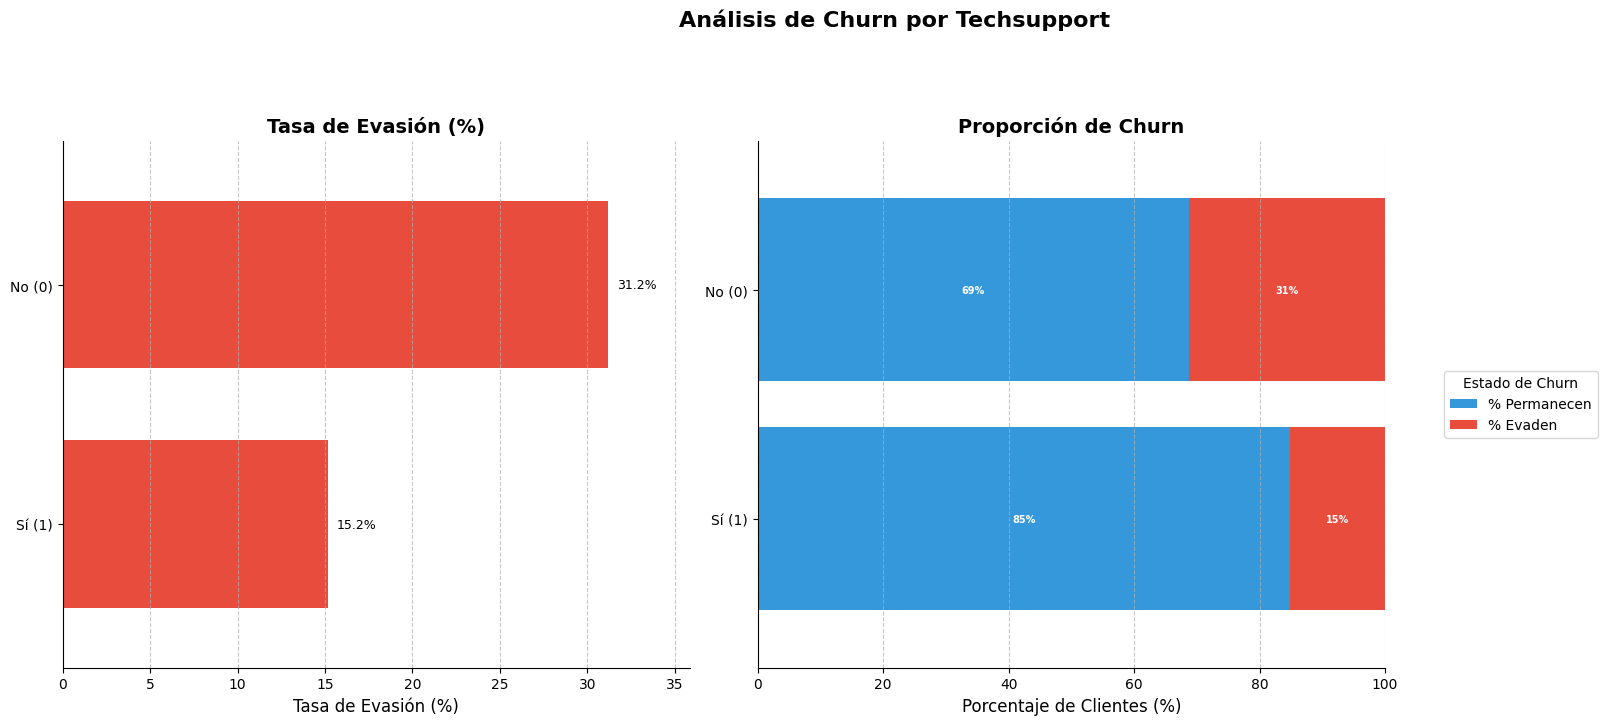


Porcentaje de Evasión/Permanencia por categoría (ordenado por % Evaden):


churn,% Permanecen,% Evaden
techsupport,,
1,84.833659,15.166341
0,68.813763,31.186237


----------------------------------------------------------------------


In [20]:
# TASAS DE EVASIÓN Y GRÁFICOS APILADOS (ALINEADOS HORIZONTALMENTE - ALTURA AJUSTADA)

col_churn = 'churn'

if not df.empty and col_churn in df.columns:
    print("\n--- ANÁLISIS DE TASA DE EVASIÓN Y PROPORCIONES POR VARIABLES CATEGÓRICAS ---")

    if 'features_to_analyze' not in locals(): 
        categorical_multivalue_cols = df.select_dtypes(include=['object', 'category', 'string']).columns.tolist()
        if 'customerid' in categorical_multivalue_cols: categorical_multivalue_cols.remove('customerid')
        binary_cols_as_cat_for_plot = [
            'gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 
            'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 
            'streamingtv', 'streamingmovies', 'paperlessbilling'
        ]
        binary_cols_as_cat_for_plot = [col for col in binary_cols_as_cat_for_plot if col in df.columns]
        features_to_analyze = sorted(list(set(categorical_multivalue_cols + binary_cols_as_cat_for_plot)))

    for feature in features_to_analyze:
        if feature in df.columns and feature != col_churn:
            feature_label = feature.capitalize().replace("_", " ")

            if df[feature].isnull().sum() == 0 and df[col_churn].isnull().sum() == 0:
                print(f"\n\n--- Análisis Comparativo para: {feature_label} ---")
                
                crosstab_norm = pd.crosstab(df[feature], df[col_churn], normalize='index') * 100
                crosstab_norm.rename(columns={0:'% Permanecen', 1:'% Evaden'}, inplace=True)
                
                plot_data_sorted_by_evasion = crosstab_norm.sort_values(by='% Evaden', ascending=True)
                y_labels_for_plot = plot_data_sorted_by_evasion.index
                
                if df[feature].dtype in ['int64', 'Int64'] and df[feature].nunique() == 2:
                     unique_vals_feat = sorted(df[feature].dropna().unique().tolist())
                     map_dict_feat_yaxis = {unique_vals_feat[0]: f'No ({unique_vals_feat[0]})', 
                                            unique_vals_feat[1]: f'Sí ({unique_vals_feat[1]})'}
                     if feature == 'gender': map_dict_feat_yaxis = {0: 'Female', 1: 'Male'}
                     elif feature == 'seniorcitizen': map_dict_feat_yaxis = {0: 'No Senior', 1: 'Senior'}
                     y_labels_for_plot = plot_data_sorted_by_evasion.index.map(map_dict_feat_yaxis)

                # --- AJUSTE DE ALTURA AQUÍ ---
                # Aumentar el multiplicador para dar más espacio vertical por categoría
                # Pruebar con valores como 0.6, 0.7, 0.8 o incluso 1.0
                height_multiplier = 2.0
                figure_height = max(7, plot_data_sorted_by_evasion.shape[0] * height_multiplier) # Mínimo 5 pulgadas de alto

                fig, axes = plt.subplots(1, 2, figsize=(18, figure_height)) 
                fig.suptitle(f'Análisis de Churn por {feature_label}', fontsize=16, fontweight='bold', y=1.03) # y un poco más alto

                # --- SUBPLOT 1: Gráfico de barras de la Tasa de Evasión ---
                ax_rate = axes[0]
                plot_data_rate_values = plot_data_sorted_by_evasion['% Evaden']
                
                plot_data_rate_values.plot(kind='barh', color='#e74c3c', width=0.7, ax=ax_rate)
                ax_rate.set_title(f'Tasa de Evasión (%)', fontsize=14, fontweight='bold')
                ax_rate.set_xlabel('Tasa de Evasión (%)', fontsize=12)
                ax_rate.set_ylabel(feature_label if df[feature].dtype not in ['int64', 'Int64'] else "", fontsize=12)
                ax_rate.set_yticklabels(y_labels_for_plot)
                ax_rate.set_xlim(0, max(plot_data_rate_values.max() * 1.15, 25) if not plot_data_rate_values.empty else 100)

                for index, value in enumerate(plot_data_rate_values):
                    ax_rate.text(value + 0.5 , index, f'{value:.1f}%', va='center', ha='left', fontsize=9)
                sns.despine(ax=ax_rate)
                ax_rate.grid(axis='x', linestyle='--', alpha=0.7)

                # --- SUBPLOT 2: Gráfico de Barras Apiladas al 100% ---
                ax_stacked = axes[1]
                plot_data_stacked = plot_data_sorted_by_evasion[['% Permanecen', '% Evaden']]
                
                plot_data_stacked.plot(
                    kind='barh', 
                    stacked=True, 
                    color={'% Permanecen': '#3498db', '% Evaden': '#e74c3c'},
                    width=0.8,
                    ax=ax_stacked
                )
                ax_stacked.set_title(f'Proporción de Churn', fontsize=14, fontweight='bold')
                ax_stacked.set_xlabel('Porcentaje de Clientes (%)', fontsize=12)
                ax_stacked.set_ylabel("") 
                ax_stacked.set_yticklabels(y_labels_for_plot)
                ax_stacked.legend(title='Estado de Churn', loc='center right', bbox_to_anchor=(1.35, 0.5)) # Ajustar bbox_to_anchor
                ax_stacked.set_xlim(0, 100)
                
                for n, (idx, row) in enumerate(plot_data_stacked.iterrows()):
                    cumulative_width = 0
                    for i, (colname, value) in enumerate(row.items()):
                        if value > 2: # Reducido el umbral para anotaciones
                            current_bar_width = value 
                            label = f'{value:.0f}%'
                            x_pos = cumulative_width + current_bar_width / 2
                            text_color = 'white'
                            if current_bar_width < 15 : text_color = '#333333'
                            ax_stacked.text(x_pos, n, label, ha='center', va='center', color=text_color, fontsize=7, fontweight='bold')
                        cumulative_width += value
                
                sns.despine(ax=ax_stacked)
                ax_stacked.grid(axis='x', linestyle='--', alpha=0.7)

                plt.tight_layout(rect=[0, 0, 0.9, 0.95]) # Ajustar rect para suptitle y leyenda externa
                plt.show()
                
                print("\nPorcentaje de Evasión/Permanencia por categoría (ordenado por % Evaden):")
                display(plot_data_sorted_by_evasion)
                print("-" * 70)
            else:
                print(f"Advertencia: La columna '{feature}' o '{col_churn}' contiene NaNs, omitiendo crosstab y gráficos de tasas.")
        else:
            print(f"Advertencia: La columna categórica '{feature}' no existe en el DataFrame.")
else:
    print(f"DataFrame vacío o la columna '{col_churn}' no disponible.")

---
#### 3.2.3. Distribución de Evasión (Churn) por Variables Numéricas

Ahora exploraremos cómo las variables numéricas clave (como la antigüedad del cliente (`tenure`), los cargos mensuales (`charges_monthly`), los cargos totales (`charges_total`) y los cargos diarios (`daily_charges`)) se distribuyen entre los clientes que cancelaron el servicio (evasión) y los que no lo hicieron.

Para este análisis, utilizaremos dos tipos principales de visualizaciones para cada variable numérica:
*   **Histogramas con Curvas de Densidad (KDE):** Nos permitirán observar la forma de las distribuciones de cada variable para ambos grupos de clientes (los que evaden y los que permanecen), ayudando a identificar diferencias en la concentración de valores.
*   **Boxplots (Diagramas de Caja y Bigotes):** Facilitarán la comparación de las estadísticas centrales (como la mediana y los cuartiles) entre los dos grupos, además de destacar la presencia de posibles valores atípicos (outliers).

El objetivo de esta subsección es identificar si ciertos rangos o niveles de estas variables numéricas están más asociados con la evasión de clientes.

--- ANÁLISIS DE EVASIÓN POR VARIABLES NUMÉRICAS (vs. 'churn') ---


--- Análisis para: Tenure ---


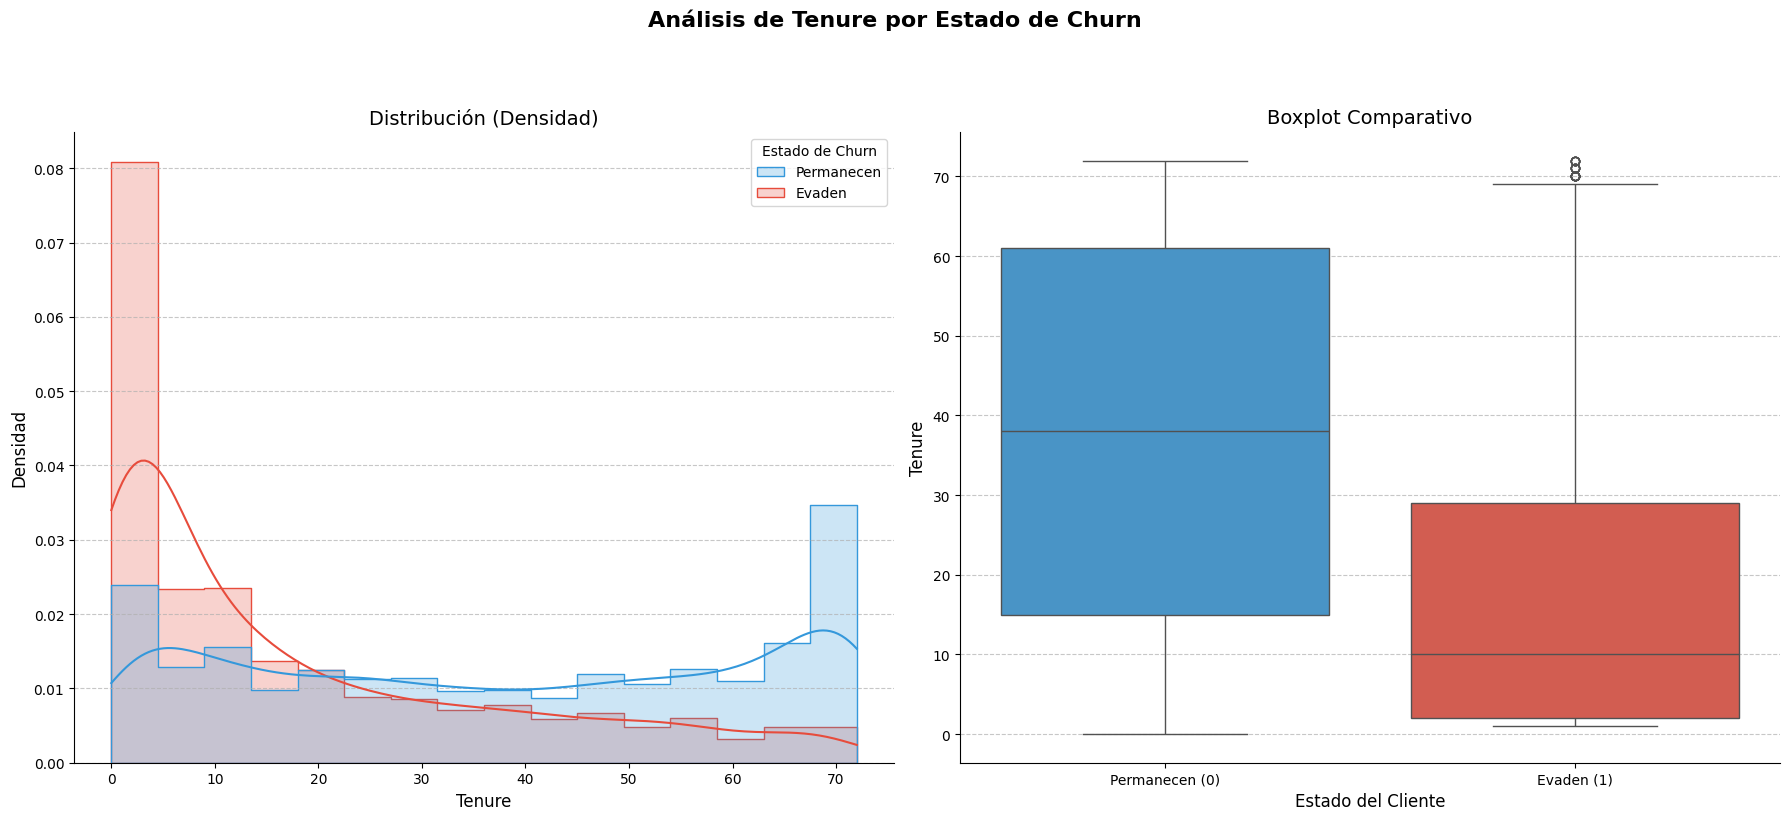


Estadísticas de 'Tenure' agrupadas por Churn:


,count,mean,median,std,min,max
churn,,,,,,
Evaden,1869,17.979133,10.0,19.531123,1,72
Permanecen,5174,37.569965,38.0,24.113777,0,72


----------------------------------------------------------------------


--- Análisis para: Charges monthly ---


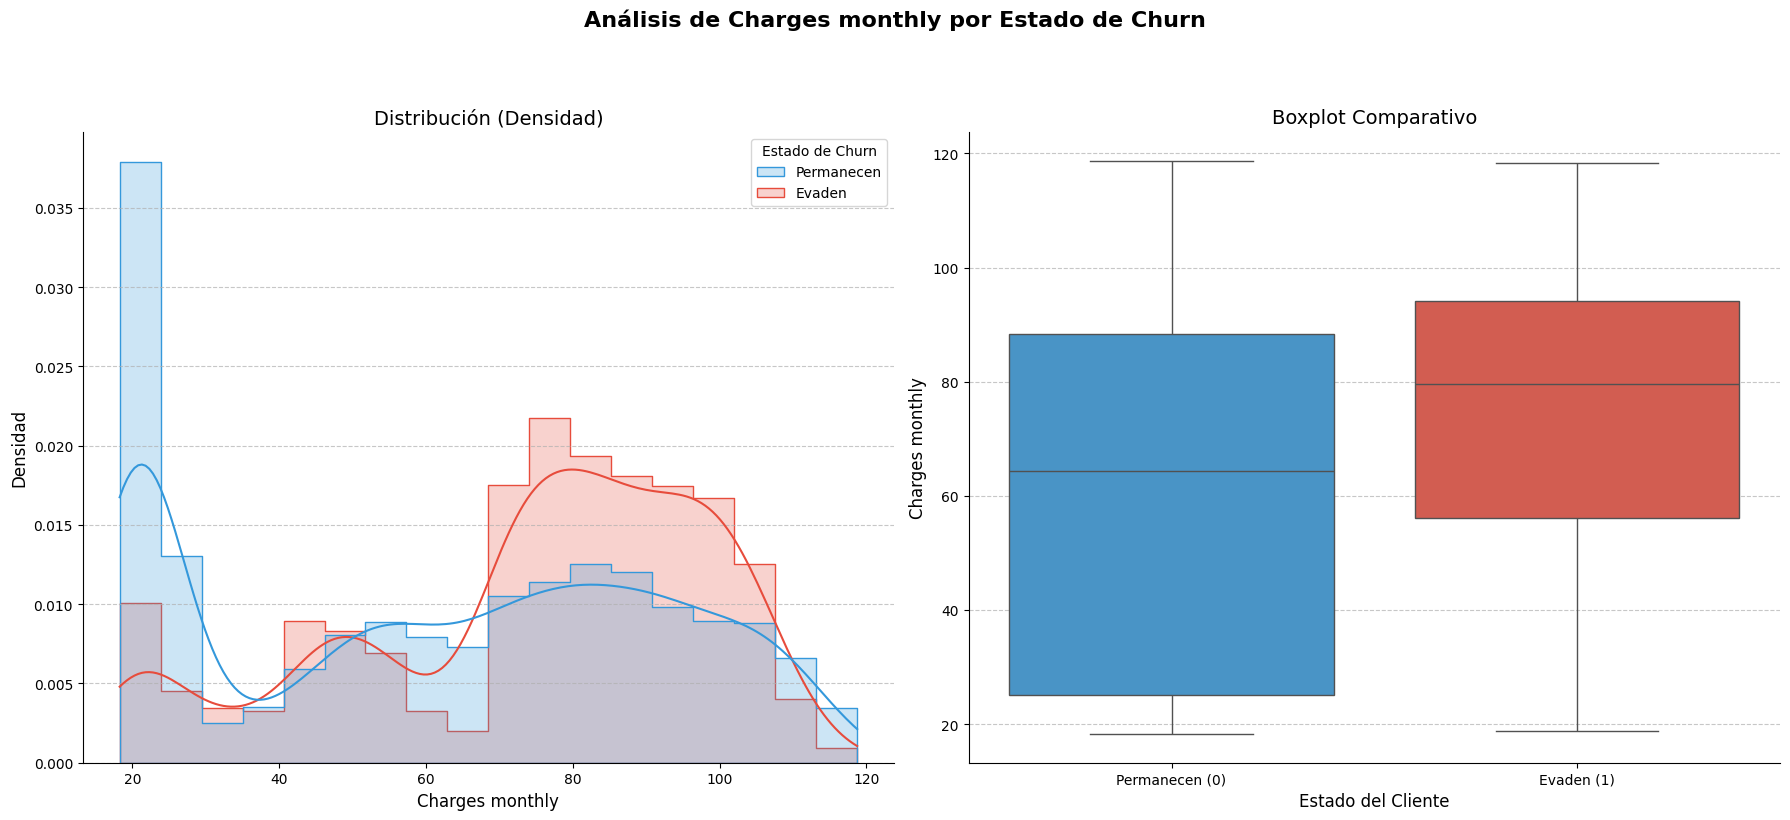


Estadísticas de 'Charges monthly' agrupadas por Churn:


,count,mean,median,std,min,max
churn,,,,,,
Evaden,1869,74.441332,79.650,24.666053,18.85,118.35
Permanecen,5174,61.265124,64.425,31.092648,18.25,118.75


----------------------------------------------------------------------


--- Análisis para: Charges total ---


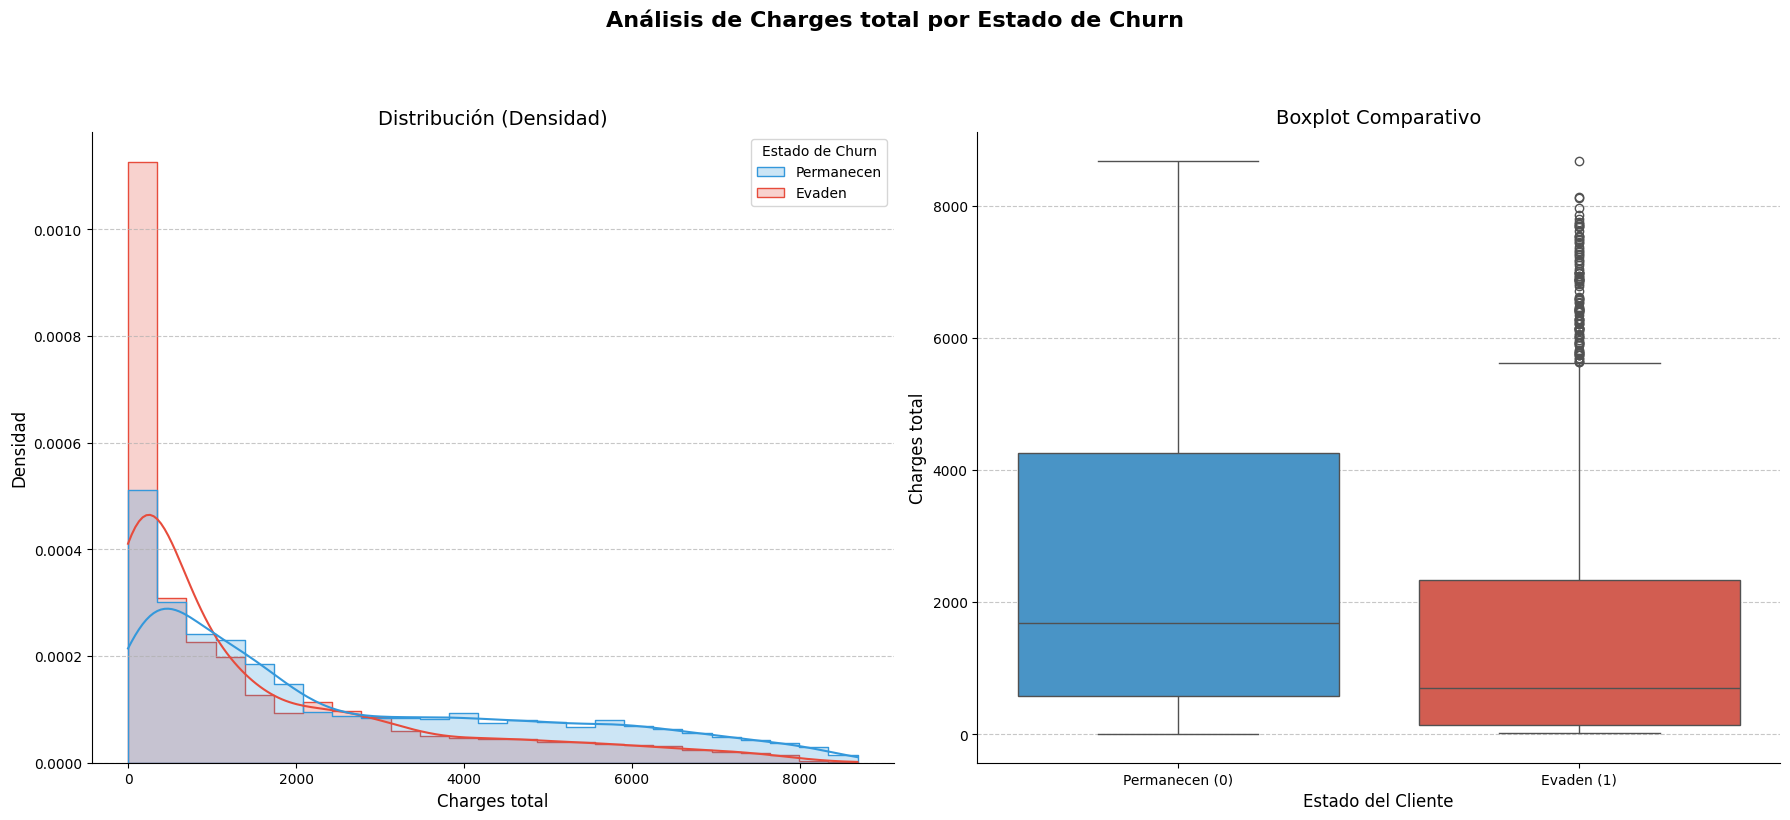


Estadísticas de 'Charges total' agrupadas por Churn:


,count,mean,median,std,min,max
churn,,,,,,
Evaden,1869,1531.796094,703.550,1890.822994,18.85,8684.80
Permanecen,5174,2549.911442,1679.525,2329.954215,0.00,8672.45


----------------------------------------------------------------------


--- Análisis para: Daily charges ---


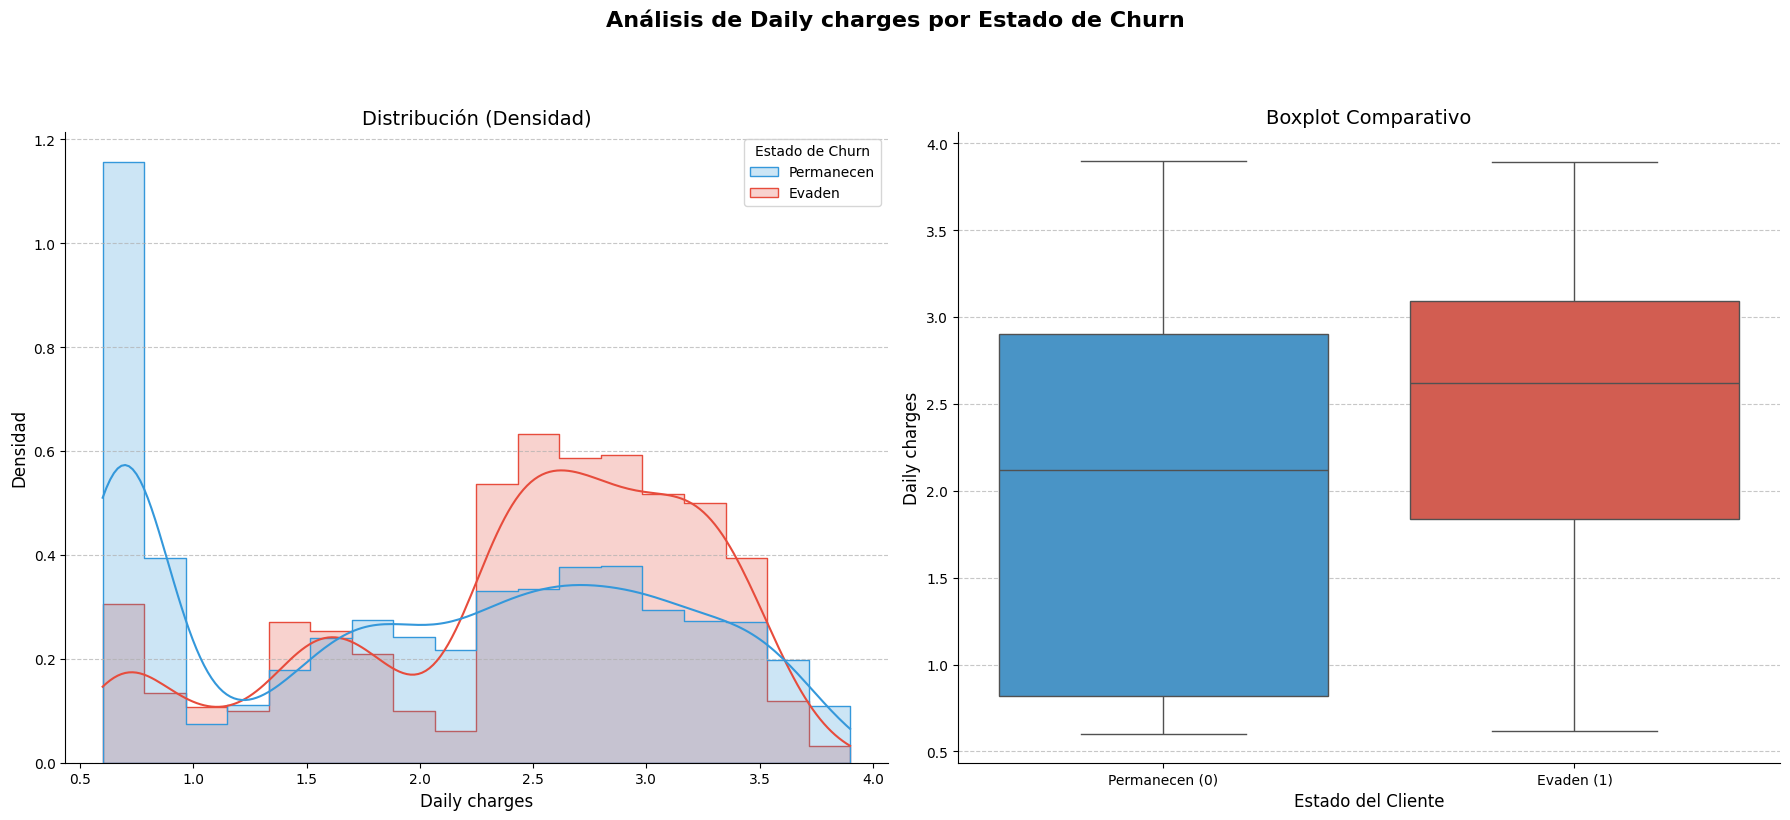


Estadísticas de 'Daily charges' agrupadas por Churn:


,count,mean,median,std,min,max
churn,,,,,,
Evaden,1869,2.445650,2.62,0.810428,0.62,3.89
Permanecen,5174,2.012841,2.12,1.021402,0.60,3.90


----------------------------------------------------------------------


In [21]:
# VISUALIZACIÓN DE CHURN POR VARIABLES NUMÉRICAS (HISTOGRAMA Y BOXPLOT ALINEADOS)

import matplotlib.pyplot as plt
import seaborn as sns
# import pandas as pd # Asumiendo que ya está importado
# import numpy as np  # Asumiendo que ya está importado
# from IPython.display import display # Asumiendo que ya está importado

col_churn = 'churn' 

if not df.empty and col_churn in df.columns:
    print(f"--- ANÁLISIS DE EVASIÓN POR VARIABLES NUMÉRICAS (vs. '{col_churn}') ---")

    numerical_features_to_analyze = [
        'tenure', 
        'charges_monthly', 
        'charges_total', 
        'daily_charges'
    ]
    
    churn_legend_map = {0: 'Permanecen', 1: 'Evaden'}
    churn_xtick_map_for_boxplot = {0: 'Permanecen (0)', 1: 'Evaden (1)'}

    for feature in numerical_features_to_analyze:
        if not (feature in df.columns and pd.api.types.is_numeric_dtype(df[feature])):
            if feature not in df.columns:
                print(f"\nAdvertencia: La columna numérica '{feature}' no existe en el DataFrame. Omitiendo...")
            else:
                print(f"\nAdvertencia: La columna '{feature}' no es de tipo numérico. Tipo actual: {df[feature].dtype}. Omitiendo...")
            print("-" * 70)
            continue 

        feature_label = feature.replace('.', ' ').replace('_', ' ').capitalize()
        print(f"\n\n--- Análisis para: {feature_label} ---")

        fig, axes = plt.subplots(1, 2, figsize=(18, 8)) # Tu figsize ajustado
        fig.suptitle(f'Análisis de {feature_label} por Estado de Churn', fontsize=16, fontweight='bold', y=1.02)

        # --- SUBPLOT 1: Histograma / KDE ---
        ax_hist = axes[0]
        sns.histplot(data=df, x=feature, hue=df[col_churn].map(churn_legend_map), 
                     kde=True, ax=ax_hist, 
                     palette={'Permanecen': '#3498db', 'Evaden': '#e74c3c'},
                     multiple="layer", 
                     element="step",
                     stat="density", common_norm=False)
        ax_hist.set_title(f'Distribución (Densidad)', fontsize=14)
        ax_hist.set_xlabel(feature_label, fontsize=12)
        ax_hist.set_ylabel('Densidad', fontsize=12)
        
        legend_hist = ax_hist.get_legend()
        if legend_hist is not None:
            legend_hist.set_title('Estado de Churn')
        elif df[col_churn].map(churn_legend_map).nunique() > 0 :
                 ax_hist.legend(title='Estado de Churn', labels=list(churn_legend_map.values())) # Asegurar que labels sea una lista

        sns.despine(ax=ax_hist)
        ax_hist.grid(axis='y', linestyle='--', alpha=0.7)

        # --- SUBPLOT 2: Boxplot ---
        ax_box = axes[1]
        x_mapped_for_boxplot = df[col_churn].map(churn_xtick_map_for_boxplot)
        sns.boxplot(data=df, x=x_mapped_for_boxplot, y=feature,
                    hue=x_mapped_for_boxplot, 
                    palette={'Permanecen (0)': '#3498db', 'Evaden (1)': '#e74c3c'},
                    order=['Permanecen (0)', 'Evaden (1)'],
                    ax=ax_box,
                    legend=False)
                                
        ax_box.set_title(f'Boxplot Comparativo', fontsize=14)
        ax_box.set_xlabel('Estado del Cliente', fontsize=12)
        ax_box.set_ylabel(feature_label, fontsize=12)
        sns.despine(ax=ax_box)
        ax_box.grid(axis='y', linestyle='--', alpha=0.7)

        plt.tight_layout(rect=[0, 0, 1, 0.96]) 
        plt.show()

        print(f"\nEstadísticas de '{feature_label}' agrupadas por Churn:")
        display(df.groupby(df[col_churn].map(churn_legend_map))[feature].agg(
            ['count', 'mean', 'median', 'std', 'min', 'max']
        ))
        print("-" * 70) 
            
else:
    print(f"DataFrame vacío o la columna '{col_churn}' no disponible para el análisis numérico.")

---

## 4. Análisis de Correlación (Extra)

Como un paso adicional y opcional en nuestro análisis, exploraremos la correlación entre diferentes variables del conjunto de datos. Este análisis nos puede ayudar a cuantificar la fuerza y dirección de las relaciones lineales entre pares de variables, y es particularmente útil para identificar qué factores podrían tener una relación más significativa con la evasión de clientes (`churn`).

Los insights obtenidos aquí pueden ser valiosos para la construcción de modelos predictivos más robustos y para entender mejor la interdependencia de las características del cliente. Nos enfocaremos en:

*   La relación entre la cuenta diaria (`daily_charges`) y la evasión (`churn`).
*   Cómo la cantidad de servicios contratados (`total_services_count`) afecta la probabilidad de `churn`.

### 4.1. Preparación de Datos para el Análisis de Correlación

Antes de calcular las correlaciones, es necesario preparar los datos. Esto implica:
1.  Asegurar que todas las variables a incluir en el análisis de correlación sean de tipo numérico.
2.  Crear nuevas características (feature engineering) si es necesario, como una variable que represente la cantidad total de servicios contratados por cada cliente.

En esta subsección, crearemos la variable `total_services_count`. Para ello, primero calcularemos temporalmente el número de servicios binarios activos (`_temp_binary_services_count`) y si el cliente tiene servicio de internet (`_temp_has_internet_service`). Luego, sumaremos estos para obtener `total_services_count` y eliminaremos las columnas temporales.

In [22]:
#  PREPARACIÓN PARA ANÁLISIS DE CORRELACIÓN

# Recordatorio: 'churn' ya es numérico (0 o 1)
# 'daily_charges' ya es numérico

# 1. Crear la columna 'total_services_count'
#   Listamos las columnas que representan servicios adicionales que el cliente puede contratar.
#   Nos aseguramos de que los nombres de columna coincidan con los ya limpiados y que sean binarios (0 o 1).
servicios_binarios_cols = [
    'phoneservice',
    'multiplelines',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies'
    # Nota: 'seniorcitizen' y 'gender' son binarias pero no son "servicios contratados" per se,
    # por lo que no se incluyen aquí para el conteo de servicios.
    # Se incluirán directamente en df_corr si se desea analizar su correlación.
]

# Verificar que todas las columnas de servicios binarios existen en el DataFrame
existing_servicios_binarios_cols = [col for col in servicios_binarios_cols if col in df.columns]

# Sumar los servicios que ya son binarios (0 o 1)
# Creamos una columna temporal para esta suma.
if existing_servicios_binarios_cols:
    df['_temp_binary_services_count'] = df[existing_servicios_binarios_cols].sum(axis=1)
else:
    df['_temp_binary_services_count'] = 0 # Si no hay columnas de servicios binarios existentes

# Tratar 'internetservice' de forma especial para el conteo
# Creamos una columna temporal para indicar si tiene internet.
if 'internetservice' in df.columns and df['internetservice'].dtype == 'category' or df['internetservice'].dtype == 'object':
    # Asumimos que 'no' en 'internetservice' significa que no tiene el servicio.
    # Los otros valores ('dsl', 'fiber_optic') significan que sí tiene.
    df['_temp_has_internet_service'] = df['internetservice'].apply(lambda x: 0 if str(x).lower() == 'no' else 1)
else:
    # Si 'internetservice' no existe o no es categórica/objeto como se espera,
    # asumimos que no se puede determinar el servicio de internet de esta forma.
    df['_temp_has_internet_service'] = 0
    if 'internetservice' in df.columns:
        print(f"Advertencia: La columna 'internetservice' no es de tipo category/object como se esperaba (tipo actual: {df['internetservice'].dtype}). No se sumará al conteo de servicios.")


# Calcular 'total_services_count'
df['total_services_count'] = df['_temp_binary_services_count'] + df['_temp_has_internet_service']

# Descartar las columnas temporales auxiliares después de usarlas
columns_to_drop_temp = ['_temp_binary_services_count', '_temp_has_internet_service']
df.drop(columns=[col for col in columns_to_drop_temp if col in df.columns], inplace=True)


print("--- Valores Únicos de 'total_services_count' ---")
if 'total_services_count' in df.columns:
    print(df['total_services_count'].value_counts().sort_index())
else:
    print("'total_services_count' no fue creada o eliminada incorrectamente.")

# 2. Seleccionar las columnas relevantes para la matriz de correlación
#    Incluimos 'churn', 'daily_charges', 'total_services_count' y otras numéricas/binarias de interés.
cols_for_corr = [
    'churn',
    'daily_charges',
    'total_services_count', # Columna recién creada
    'tenure',
    'charges_monthly',
    'charges_total',
    'seniorcitizen', # Ya es 0 o 1
    'gender'         # Ya es 0 o 1
]

# Filtrar solo las columnas que existen en el df para evitar errores
existing_cols_for_corr = [col for col in cols_for_corr if col in df.columns]

if existing_cols_for_corr:
    df_corr = df[existing_cols_for_corr].copy() # Usar .copy() para evitar SettingWithCopyWarning
    print("\n--- Primeras Filas del DataFrame para Correlación (df_corr) ---")
    display(df_corr.head())
else:
    print("\nNo se encontraron columnas suficientes para el análisis de correlación.")
    df_corr = pd.DataFrame() # Crear DataFrame vacío para evitar errores en celdas siguientes

--- Valores Únicos de 'total_services_count' ---
total_services_count
1    1264
2     859
3     846
4     965
5     922
6     908
7     676
8     395
9     208
Name: count, dtype: int64

--- Primeras Filas del DataFrame para Correlación (df_corr) ---


,churn,daily_charges,total_services_count,tenure,charges_monthly,charges_total,seniorcitizen,gender
0,0,2.16,5,9,65.6,593.30,0,0
1,0,1.97,4,9,59.9,542.40,0,1
2,1,2.43,3,4,73.9,280.85,0,1
3,1,3.22,6,13,98.0,1237.85,1,1
4,1,2.76,4,3,83.9,267.40,1,0



**Explicación del Paso 1 (Preparación de Datos):**
*   Se listan las columnas que representan servicios que ya han sido convertidos a un formato binario (0 o 1).
*   Se crea una columna temporal `_temp_binary_services_count` sumando estos servicios binarios.
*   Se trata la columna `internetservice` (que es categórica) para crear otra columna temporal, `_temp_has_internet_service`, que es 1 si el cliente tiene cualquier tipo de servicio de internet ('dsl' o 'fiber_optic') y 0 si no tiene ('no').
*   La columna final `total_services_count` se calcula sumando `_temp_binary_services_count` y `_temp_has_internet_service`.
*   Importante: Las columnas temporales `_temp_binary_services_count` y `_temp_has_internet_service` se eliminan del DataFrame principal `df` después de ser utilizadas, para mantener el conjunto de datos limpio.
*   Finalmente, se selecciona un subconjunto de columnas numéricas y binarias relevantes (incluyendo la recién creada `total_services_count`) en un nuevo DataFrame llamado `df_corr`, que se utilizará para calcular la matriz de correlación.

---
### 4.2. Matriz de Correlación
Con los datos preparados en `df_corr`, ahora calcularemos la matriz de correlación. Visualizaremos esta matriz usando un heatmap de Seaborn, una herramienta gráfica efectiva para identificar rápidamente patrones y la intensidad de las relaciones lineales entre las variables seleccionadas.

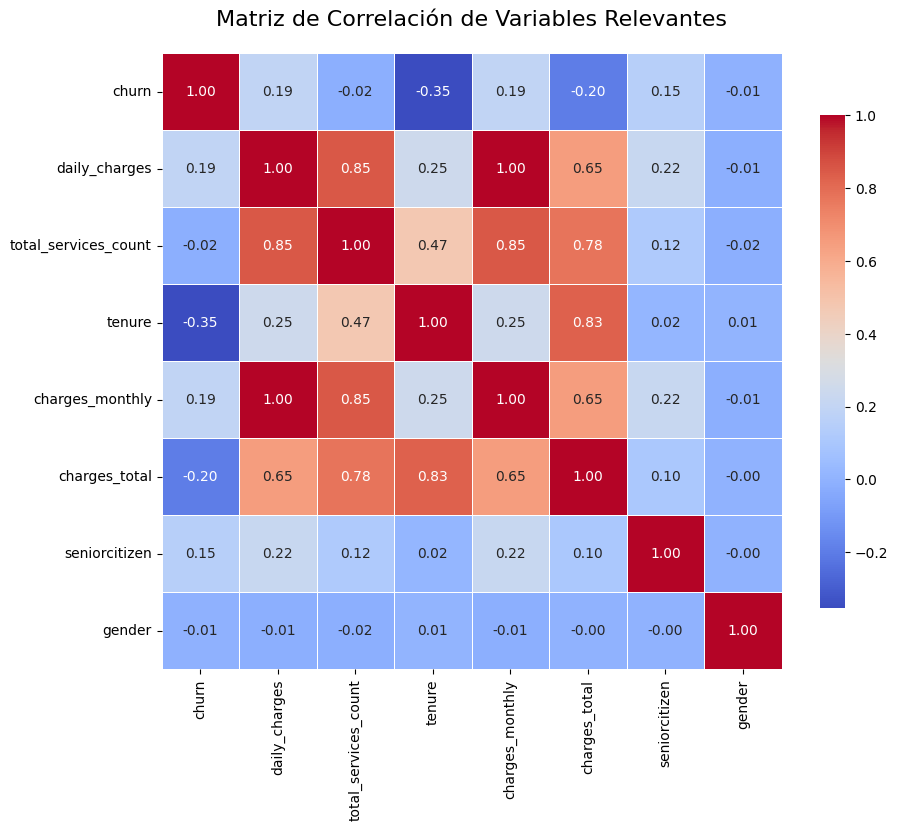


--- Correlación Específica con 'churn' ---
churn                   1.000000
charges_monthly         0.193356
daily_charges           0.193336
seniorcitizen           0.150889
gender                 -0.008612
total_services_count   -0.019375
charges_total          -0.198324
tenure                 -0.352229
Name: churn, dtype: float64


In [23]:
# MATRIZ DE CORRELACIÓN

if not df_corr.empty:
    # Calcular la matriz de correlación
    correlation_matrix = df_corr.corr()

    # Visualizar la matriz de correlación usando un heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix,
                annot=True,          # Mostrar los valores de correlación en las celdas
                cmap='coolwarm',     # Paleta de colores (azul para negativo, rojo para positivo)
                fmt=".2f",           # Formato de los números (2 decimales)
                linewidths=.5,       # Líneas entre celdas
                cbar_kws={"shrink": .8} # Ajustar el tamaño de la barra de color
               )
    plt.title('Matriz de Correlación de Variables Relevantes', fontsize=16, pad=20)
    plt.show()

    if 'churn' in correlation_matrix:
        print("\n--- Correlación Específica con 'churn' ---")
        # Mostrar solo la correlación de todas las variables con 'churn', ordenadas
        churn_correlation = correlation_matrix['churn'].sort_values(ascending=False)
        print(churn_correlation)
    else:
        print("La columna 'churn' no está en el DataFrame de correlación.")
else:
    print("El DataFrame para correlación (df_corr) está vacío. No se puede generar la matriz.")


**Interpretación de la Matriz de Correlación y Correlación con `churn`:**
*   **Valores Cercanos a +1:** Indican una fuerte correlación positiva (a medida que una variable aumenta, la otra tiende a aumentar).
*   **Valores Cercanos a -1:** Indican una fuerte correlación negativa (a medida que una variable aumenta, la otra tiende a disminuir).
*   **Valores Cercanos a 0:** Indican una correlación débil o nula.

Prestaremos especial atención a la fila (o columna) correspondiente a `churn` en el heatmap y en la serie de correlaciones impresas. Esto nos ayudará a entender:
*   La relación entre `daily_charges` y `churn`: ¿Existe una tendencia de que clientes con cargos diarios más altos (o más bajos) evadan más?
*   La relación entre `total_services_count` y `churn`: ¿Tener un mayor (o menor) número total de servicios contratados se asocia con una mayor o menor probabilidad de evasión?
*   La relación entre `tenure` y `churn`: Comúnmente, se espera que los clientes con mayor antigüedad (tenure) tengan menor probabilidad de evadir.
*   La relación entre `charges_monthly` y `churn`: ¿Cómo influyen los cargos mensuales en la decisión de los clientes de permanecer o irse?

---
### 4.3. Visualización Específica de Relaciones con `churn`

Aunque la matriz de correlación ofrece una visión general, para nuestras preguntas específicas, ciertos gráficos pueden ser más directos y elocuentes.

#### a) Relación entre `daily_charges` y `churn`
La relación entre una variable numérica (`daily_charges`) y una variable binaria (`churn`) se visualizó efectivamente mediante boxplots en la sección `3.2.3. Distribución de Evasión (Churn) por Variables Numéricas`. La matriz de correlación calculada en el paso `4.2` nos proporciona una medida numérica de la fuerza y dirección de esta relación lineal.

#### b) Impacto de la `total_services_count` en la probabilidad de `churn`
Para entender cómo la cantidad total de servicios contratados influye en la evasión, agruparemos los clientes por su `total_services_count` y calcularemos la tasa de churn promedio para cada grupo. Esto se visualizará mediante un gráfico de barras, lo que facilitará la identificación de cualquier tendencia o patrón.

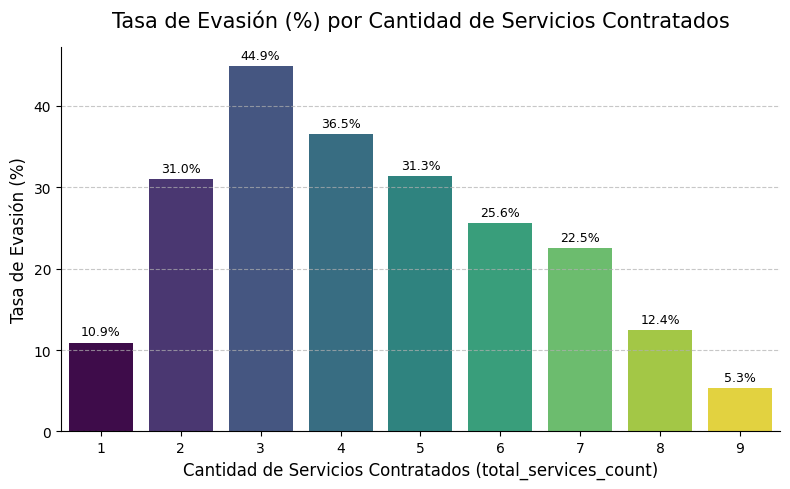


--- Tasa de Evasión por Cantidad de Servicios Contratados ---
total_services_count
1    10.917722
2    30.966240
3    44.917258
4    36.476684
5    31.344902
6    25.550661
7    22.485207
8    12.405063
9     5.288462
Name: churn, dtype: float64


In [24]:
# ANÁLISIS DE CHURN POR CANTIDAD DE SERVICIOS

if 'total_services_count' in df.columns and 'churn' in df.columns:
    # Calcular la tasa de churn promedio por cantidad de servicios
    churn_rate_by_services = df.groupby('total_services_count')['churn'].mean() * 100 # En porcentaje
    churn_rate_by_services = churn_rate_by_services.sort_index()

    if not churn_rate_by_services.empty:
        plt.figure(figsize=(8, 5)) # Ajustado para mejor visualización si hay muchas categorías
        ax = sns.barplot(x=churn_rate_by_services.index,
                         y=churn_rate_by_services.values,
                         hue=churn_rate_by_services.index,  # <--- ACTUALIZADO
                         palette="viridis",                 # Probar otras paletas
                         legend=False)                      # <--- ACTUALIZADO

        plt.title('Tasa de Evasión (%) por Cantidad de Servicios Contratados', fontsize=15, pad=15)
        plt.xlabel('Cantidad de Servicios Contratados (total_services_count)', fontsize=12)
        plt.ylabel('Tasa de Evasión (%)', fontsize=12)
        # plt.xticks(rotation=45, ha='right') # Descomentar si hay muchas categorías de conteo de servicios
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Añadir anotaciones de porcentaje en las barras
        for i, v_bar in enumerate(ax.patches): # Iterar sobre los patches (barras)
            # Obtener la altura de la barra (valor y)
            height = v_bar.get_height()
            # Escribir el texto en la barra
            ax.text(v_bar.get_x() + v_bar.get_width()/2., # Posición x (centro de la barra)
                    height + 0.5,                       # Posición y (un poco encima de la barra)
                    f"{height:.1f}%",                   # Texto a mostrar
                    color='black',
                    ha='center',
                    va='bottom',
                    fontsize=9)

        sns.despine()
        plt.tight_layout()
        plt.show()

        print("\n--- Tasa de Evasión por Cantidad de Servicios Contratados ---")
        print(churn_rate_by_services)
    else:
        print("No se pudieron calcular las tasas de churn por cantidad de servicios (churn_rate_by_services está vacío).")
else:
    print("Las columnas 'total_services_count' o 'churn' no están disponibles para este análisis.")

**Interpretación del Gráfico de Tasa de Evasión por `total_services_count`:**
Este gráfico nos mostrará si existe un patrón discernible entre el número total de servicios que un cliente ha contratado y su propensión a evadir. Por ejemplo, podríamos observar si la tasa de evasión disminuye consistentemente a medida que aumenta el número de servicios, o si existe algún umbral a partir del cual la evasión se incrementa o disminuye notablemente.

---
_Fin de la sección de Análisis de Correlación._


---

### **5. Informe Final: Análisis de Evasión de Clientes en TelecomX LATAM**

📅 **Fecha:** 10 de junio de 2025

---

#### **5.1. Introducción**

Este informe presenta los resultados del análisis exploratorio aplicado al conjunto de datos de clientes de **TelecomX LATAM**, con el objetivo de comprender los factores que impulsan la **evasión de clientes (churn)**.

Dada la alta tasa de cancelaciones, este fenómeno representa una amenaza directa a los ingresos recurrentes y a la sostenibilidad del negocio. Para abordar esta problemática, se ejecutaron las fases de **extracción, limpieza, transformación y análisis visual** de los datos.

El objetivo central fue identificar patrones que diferencien a los clientes que abandonan el servicio de aquellos que permanecen. Estos hallazgos constituyen la base para recomendaciones estratégicas orientadas a mejorar la retención y satisfacción del cliente.

---

#### **5.2. Limpieza y Preparación de los Datos**

Se trabajó con un dataset inicial de **7,267 registros** y **21 columnas**. Las acciones principales de procesamiento fueron:

##### **5.2.1. Extracción y Carga del Dataset**
- Los datos fueron obtenidos en formato JSON desde la URL:
  `https://storage.googleapis.com/desafio-telecomx-churn-analysis/Dataset/TelecomX_Data.json`
- Se implementó manejo de errores y validación de formato JSON.
- Los datos fueron normalizados con `pandas.json_normalize()`.

##### **5.2.2. Inspección General**
- Se usaron métodos como `df.info()`, `df.describe()` y `df.shape` para revisar la estructura, tipos de datos y valores nulos.

##### **5.2.3. Tratamiento de Valores Nulos y Duplicados**
- La columna `charges_total` (originalmente `account.charges_total`) contenía strings vacíos que fueron tratados como `NaN`, convertidos a `float` e imputados con `0`.
- Se eliminaron filas donde la columna `churn` estaba vacía, reduciendo el dataset a **7,043 registros válidos**.
- Se verificó y eliminó cualquier fila duplicada.

##### **5.2.4. Estandarización y Limpieza de Variables**
- **Nombres de Columnas:** Se eliminaron prefijos (`customer.`, `account.`, etc.), se convirtieron a minúsculas y se reemplazaron los puntos por guiones bajos.
- **Contenido Textual:** El contenido de las columnas `object` fue convertido a minúsculas y se eliminaron espacios en blanco.
- **Valores Específicos:** Valores como "no internet service" fueron estandarizados a "no".
- **Formato de Valores Categóricos:** En `paymentmethod`, `contract` e `internetservice`, los espacios se reemplazaron por guiones bajos y se eliminaron los paréntesis para mejorar la legibilidad.

##### **5.2.5. Conversión de Tipos**
- Variables binarias ('yes'/'no') fueron convertidas a `int` (yes: 1, no: 0).
- La columna `gender` fue convertida a `int` (female: 0, male: 1).
- Columnas categóricas clave (`internetservice`, `contract`) fueron convertidas al tipo `category` para optimizar el uso de memoria.

##### **5.2.6. Feature Engineering**
- Se creó la columna `daily_charges` para analizar los cargos diarios.
- Se creó la columna `total_services_count` para cuantificar el número de servicios contratados por cliente.

✅ **Resultado**: DataFrame final con **7,043 filas** y **22 columnas procesadas**, listo para el análisis.

---

#### **5.3. Análisis Exploratorio de Datos (EDA)**

##### **5.3.1. Estadísticas Generales**
- La **antigüedad promedio (`tenure`)** de los clientes es de **32.4 meses** (mediana: 29 meses).
- Los **cargos mensuales (`charges_monthly`)** tienen una media de **&#36;64.76**.
- El **55%** de los clientes (3,875) tienen un contrato de tipo `month-to-month`.

##### **5.3.2. Distribución de Churn**
El análisis de la variable objetivo `churn` muestra una tasa de evasión general del **26.5%**.

- **73.5%** de los clientes permanecen activos (Churn = 0).
- **26.5%** de los clientes han cancelado el servicio (Churn = 1).

<div style="text-align: center;">
  <img src="https://storage.googleapis.com/desafio-telecomx-churn-analysis/Gr%C3%A1ficos_Informe/distribucion_churn.png" alt="Distribución de Evasión de Clientes (Churn)" width="600" />
</div>

```
El gráfico ilustra que aproximadamente una cuarta parte de la base de clientes ha cancelado su servicio, validando la importancia de este análisis.
```

---

##### **5.3.3. Evasión por Variables Categóricas**
Las tasas de evasión (porcentaje de clientes que cancelan dentro de cada categoría) revelaron los siguientes factores de riesgo:

| Variable | Categoría | % Churn |
| :--- | :--- | :--- |
| `paymentmethod` | `electronic_check` | **45.3%** |
| `contract` | `month-to-month` | **42.7%** |
| `internetservice`| `fiber_optic` | **41.9%** |
| `onlinesecurity` | `no` | **31.3%** |

**Análisis de Churn por Tipo de Contrato (`contract`)**
<div style="text-align: center;">
  <img src="https://storage.googleapis.com/desafio-telecomx-churn-analysis/Gr%C3%A1ficos_Informe/tasas_proporciones_churn_por_contract.png" alt="Tasas y Proporciones de Churn por Contract" width="800" />
</div>

```
Los clientes con contrato `month-to-month` muestran la tasa de evasión más alta (42.7%). En contraste, aquellos con contratos a `two_year` son significativamente más leales (tasa de evasión del 2.8%).
```

**Análisis de Churn por Servicio de Internet (`internetservice`)**
<div style="text-align: center;">
  <img src="https://storage.googleapis.com/desafio-telecomx-churn-analysis/Gr%C3%A1ficos_Informe/tasas_proporciones_churn_por_internetservice.png" alt="Tasas y Proporciones de Churn por Internet Service" width="800" />
</div>

```
El servicio `fiber_optic` se asocia con la tasa de evasión más elevada (41.9%). Los clientes sin internet son los más leales (7.4%).
```

---

##### **5.3.4. Evasión por Variables Numéricas**
El análisis de medianas revela diferencias importantes en el perfil de los clientes que evaden versus los que permanecen.

| Variable | Evaden (Mediana) | Permanecen (Mediana) |
| :--- | :--- | :--- |
| `tenure` | 10 meses | 38 meses |
| `charges_monthly`| &#36;79.65 | &#36;64.43 |
| `charges_total` | **&#36;703.55** | **&#36;1,679.53** |
| `daily_charges` | &#36;2.62 | &#36;2.12 |

**Análisis de Churn por Antigüedad (`tenure`)**
<div style="text-align: center;">
  <img src="https://storage.googleapis.com/desafio-telecomx-churn-analysis/Gr%C3%A1ficos_Informe/numeric_analysis_churn_por_tenure.png" alt="Análisis de Tenure por Estado de Churn" width="800"/>
</div>

```
Los clientes con menor antigüedad tienden a evadir más. La distribución para quienes evaden está concentrada en los primeros meses.
```

**Análisis de Churn por Cargos Totales (`charges_total`)**
<div style="text-align: center;">
  <img src="https://storage.googleapis.com/desafio-telecomx-churn-analysis/Gr%C3%A1ficos_Informe/numeric_analysis_churn_por_charges_total.png" alt="Análisis de Cargos Totales por Estado de Churn" width="800" />
</div>

```
los clientes que abandonaron el servicio acumularon cargos totales significativamente menores (mediana de $703.55) que los clientes que permanecieron (mediana de $1,679.53). Esta diferencia se alinea con el menor tiempo de permanencia de los clientes que se dieron de baja.
```

---

##### **5.3.5. Correlación y Tendencias Adicionales**

| Variable | Correlación con `churn` |
| :--- | :--- |
| `tenure` | **-0.35** (Fuerte negativa) |
| `charges_monthly`| **+0.19** (Débil positiva) |
| `total_services_count` | **-0.02** (Casi nula) |

**Matriz de Correlación de Variables Relevantes**
<div style="text-align: center;">
  <img src="https://storage.googleapis.com/desafio-telecomx-churn-analysis/Gr%C3%A1ficos_Informe/matriz_correlacion_heatmap.png" alt="Matriz de Correlación" width="700" />
</div>

```
El heatmap muestra que la antigüedad (`tenure`) tiene la correlación negativa más notable con `churn`. Los cargos mensuales (`charges_monthly`) tienen una correlación positiva débil. La cantidad total de servicios (`total_services_count`) no muestra una correlación lineal fuerte con la evasión.
```

📊 **Tendencia de Evasión por Cantidad de Servicios Contratados**
El análisis revela un patrón no lineal: la evasión es baja con 1 servicio (10.9%), alcanza un pico con **3 servicios (44.9%)**, y luego disminuye considerablemente a partir de 6 servicios.

<div style="text-align: center;">
  <img src="https://storage.googleapis.com/desafio-telecomx-churn-analysis/Gr%C3%A1ficos_Informe/tasa_churn_por_cantidad_servicios.png" alt="Tasa de Churn por Cantidad de Servicios" width="700" />
</div>

```
Este gráfico ilustra una compleja relación entre la cantidad de servicios y la lealtad, sugiriendo que ni muy pocos ni un número intermedio de servicios son óptimos para la retención.
```

---

#### **5.4. Conclusiones Principales**

1.  **Tipo de Contrato (`contract`):** Es el predictor individual más fuerte. Los contratos `month-to-month` son el principal impulsor de la evasión (42.7%).
2.  **Antigüedad (`tenure`):** Factor crucial. Clientes con menos de 12 meses de antigüedad presentan un riesgo de evasión significativamente mayor.
3.  **Servicio de Internet (`internetservice`):** Los clientes con `fiber_optic` tienen una alta tasa de evasión (41.9%), posiblemente por problemas de servicio, precio o expectativas no cumplidas.
4.  **Servicios de Valor Añadido:** La ausencia de `onlinesecurity`, `techsupport` y `onlinebackup` se asocia consistentemente con mayores tasas de evasión.
5.  **Método de Pago (`paymentmethod`):** El uso de `electronic_check` está fuertemente correlacionado con una mayor tasa de evasión (45.3%).
6.  **Cantidad de Servicios (`total_services_count`):** La relación con el churn no es lineal. El punto crítico parece estar entre 2 y 5 servicios, donde la evasión es más alta.
7.  **Cargos Mensuales (`charges_monthly`):** Aunque quienes evaden pagan un poco más, la relación es más débil en comparación con otros factores.

---

#### **5.5. Recomendaciones Estratégicas**

1.  **Fomentar Contratos a Largo Plazo:**
    *   **Acción:** Implementar campañas para migrar a clientes de contratos `month-to-month` (especialmente aquellos con `fiber_optic` o que pagan con `electronic_check`) a planes anuales o bianuales.
    *   **Incentivos:** Ofrecer descuentos significativos, upgrades de servicio o beneficios exclusivos por permanencia.

2.  **Fortalecer el Onboarding y la Retención Temprana:**
    *   **Acción:** Desarrollar un programa de onboarding robusto para los primeros 3-6 meses, enfocado en asegurar la satisfacción y el uso de los servicios.
    *   **Justificación:** Mitigar la alta tasa de churn en clientes con baja antigüedad (`tenure`).

3.  **Auditar y Optimizar la Experiencia del Servicio `fiber_optic`:**
    *   **Acción:** Realizar análisis de causa raíz para los clientes de `fiber_optic` que han evadido. Evaluar precios, calidad del servicio y efectividad del soporte técnico.
    *   **Justificación:** Abordar la alta tasa de evasión en lo que debería ser un servicio premium.

4.  **Promocionar Activamente Servicios de Valor Añadido:**
    *   **Acción:** Crear paquetes que incluyan `onlinesecurity`, `techsupport` y `onlinebackup` a precios atractivos. Educar a los clientes sobre sus beneficios.
    *   **Justificación:** Estos servicios demostraron ser factores clave de retención.

5.  **Mejorar y Diversificar los Métodos de Pago:**
    *   **Acción:** Investigar fricciones en el pago con `electronic_check` e incentivar la adopción de métodos automáticos (débito directo, tarjeta de crédito).
    *   **Justificación:** Reducir el riesgo asociado al método de pago más problemático.

6.  **Revisar y Optimizar el Portfolio de Paquetes de Servicios:**
    *   **Acción:** Analizar la estructura de precios y beneficios de los paquetes que incluyen entre 2 y 5 servicios. Considerar la creación de "mini-bundles" de alto valor.
    *   **Justificación:** Abordar la alta tasa de churn en el segmento de 2-5 servicios.

7.  **Implementar Modelos Predictivos de Churn:**
    *   **Acción:** Utilizar los factores identificados (especialmente `contract`, `tenure`, `internetservice`, `onlinesecurity`) como variables clave para desarrollar modelos de machine learning.
    *   **Justificación:** Permitiría a TelecomX LATAM realizar intervenciones proactivas para retener a los clientes en riesgo antes de que cancelen el servicio.

---

*Informe elaborado por:*
**Nelson Enrique Reyes Fabián**
Desafío Alura LATAM — TelecomX